In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df_selec_2=pd.read_csv("df_selec_2.csv")

In [3]:
df_final=pd.read_csv("df_final.csv")

C:\Users\Anne\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (45,141,142,143,171,196,232) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Rajout des variables supprimées en NB 3 pq elles gênaient la modélisation pour sélection de features

df_selec_add=df_final[["idmutation","etaban_lot"]]

In [5]:
df_selec_add.isna().sum()

idmutation    0
etaban_lot    0
dtype: int64

In [6]:
df_selec_2=df_selec_2.merge(df_selec_add, on="idmutation")

In [7]:
df_selec_2.head()

,idmutation,qty_of_mut,y,idnatmut,datemut,anneemut,moismut,libnatmut,vefa,valeurfonc,...,adedpe202006_logtype_ecs_type_inst,adedpe202006_logtype_mur_ep_mat_ext,adedpe202006_logtype_mur_mat_ext,adedpe202006_logtype_mur_pos_isol_ext,insbpe2019_l_type_equipement_supermarché,insbpe2019_l_type_equipement_restaurant,insbpe2019_l_type_equipement_boulangerie,insbpe2019_l_type_equipement_aucun,insbpe2019_l_type_equipement_autre,etaban_lot
0,7819809,1,0,1,2021-06-04,2021,6,Vente,f,370000.0,...,NaN,NaN,Indeterminé,Unknown,0,0,0,1,0,75101_4901_00019_93
1,7819819,1,0,1,2021-11-25,2021,11,Vente,f,682000.0,...,NaN,NaN,Indeterminé,Unknown,0,0,0,1,0,75111_1383_00005_8057
2,7819821,1,0,1,2021-03-18,2021,3,Vente,f,451000.0,...,NaN,NaN,Indeterminé,Unknown,0,0,0,1,0,75117_5503_00103_24
3,7819822,1,0,1,2021-11-12,2021,11,Vente,f,433000.0,...,NaN,NaN,Indeterminé,Unknown,0,0,0,1,0,75115_2521_00008_19
4,7819824,2,1,1,2021-01-08,2021,1,Vente,f,561076.0,...,NaN,NaN,Indeterminé,Unknown,0,0,0,0,1,75118_2113_00110_19


In [8]:
# Idmutation en index
df_selec_2.set_index("idmutation", inplace=True)

In [9]:
df_selec_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93751 entries, 7819809 to 8843172
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   qty_of_mut                                   93751 non-null  int64  
 1   y                                            93751 non-null  int64  
 2   idnatmut                                     93751 non-null  int64  
 3   datemut                                      93751 non-null  object 
 4   anneemut                                     93751 non-null  int64  
 5   moismut                                      93751 non-null  int64  
 6   libnatmut                                    93751 non-null  object 
 7   vefa                                         93751 non-null  object 
 8   valeurfonc                                   93717 non-null  float64
 9   nblot                                        93751 non-null  int

In [10]:
df_selec_2.isna().sum()

qty_of_mut                                         0
y                                                  0
idnatmut                                           0
datemut                                            0
anneemut                                           0
moismut                                            0
libnatmut                                          0
vefa                                               0
valeurfonc                                        34
nblot                                              0
nbcomm                                             0
l_codinsee                                         0
nblocapt                                           0
nblocdep                                           0
nbapt2pp                                           0
nbapt3pp                                           0
sbati                                              0
sbatapt                                            0
sbatact                                       

In [11]:
# Grosse proportion de Nan dans les variables issues du CSTB (voir démonstration en fin de NB1)=>
# Cette forte proportion de Nan est due au fichier d'origine CSTB. Pas de perte due aux merge ou autre

# Les variables "anarnc202012_nb_log ", "anarnc202012_nb_lot_garpark", "anarnc202012_nb_lot_tertiaire"...
#..."anarnc202012_nb_lot_tot" ont le même nombre de Nan. 
# On fait le pari qu'en supprimant les lignes Nan en colonne "anarnc202012_nb_log...
#... les Nan vont aussi disparaitre ou réduire drastiquement dans les autres colonnes CSTB

df_selec_2=df_selec_2.dropna(subset=["anarnc202012_nb_log"])

In [12]:
df_selec_2.isna().sum()

qty_of_mut                                         0
y                                                  0
idnatmut                                           0
datemut                                            0
anneemut                                           0
moismut                                            0
libnatmut                                          0
vefa                                               0
valeurfonc                                        23
nblot                                              0
nbcomm                                             0
l_codinsee                                         0
nblocapt                                           0
nblocdep                                           0
nbapt2pp                                           0
nbapt3pp                                           0
sbati                                              0
sbatapt                                            0
sbatact                                       

In [13]:
# Pari réussi. On part là dessus...

In [14]:
df_selec_2["y"].value_counts()

0    46257
1    10087
Name: y, dtype: int64

In [15]:
# Renommer la variable cible pour être plus explicite 

df_selec_2=df_selec_2.rename({"y":"Revente"}, axis=1)
df_selec_2["Revente"]

idmutation
7819827    0
7819828    0
7819829    0
7819852    1
8577053    1
          ..
8843146    0
8843152    0
8843161    0
8843163    0
8843171    0
Name: Revente, Length: 56344, dtype: int64

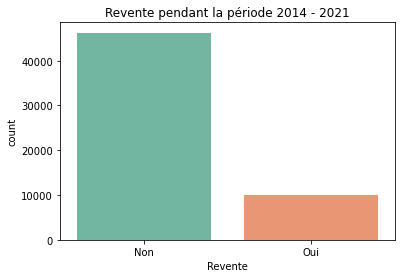

In [16]:
# Analyse de la variable "Revente"
g=sns.countplot(x="Revente", data=df_selec_2, palette="Set2")
g.set_xticklabels(["Non", "Oui"])
plt.title('Revente pendant la période 2014 - 2021');

In [17]:
# "Variable "QTy of mut"
df_selec_2["qty_of_mut"].value_counts()

1    46257
2     9511
3      552
4       24
Name: qty_of_mut, dtype: int64

In [18]:
# La variable "qty_of_mut" nous donne le nombre de mutations du lot pendant la période 2014-2021
# Mais notre projet consiste à travailler sur le nombre de fois où le bien a été revendu (en plus de cette première mutation)
# pdt la période. Donc pour une meilleure compréhension, on va renommer les modalités 


df_selec_2["qty_of_mut"]=df_selec_2["qty_of_mut"].replace({1:0, 2:1, 3:2, 4:3})
df_selec_2["qty_of_mut"].value_counts()


0    46257
1     9511
2      552
3       24
Name: qty_of_mut, dtype: int64

In [19]:
# ANALYSE DE LA VARIABLE "idnatmut" =>  identifiant de clef primaire de la table ann_nature_mutation (1=vente - 2 = vefa)

df_selec_2["idnatmut"].value_counts(ascending=False)

1    56241
2      103
Name: idnatmut, dtype: int64

In [20]:
# ANALYSE DE LA VARIABLE "libnatmut" => libellé de la nature de mutation 

df_selec_2["libnatmut"].value_counts()

Vente                                 56241
Vente en l'état futur d'achèvement      103
Name: libnatmut, dtype: int64

In [21]:
# ANALYSE DE LA VARIABLE "vefa" => vrai si la mutation est une Vente en l'état futur d'achèvement (VEFA)

df_selec_2["vefa"].value_counts()

f    56241
t      103
Name: vefa, dtype: int64

In [22]:
# Redondance de ces 3 variables. Suppression de "idnatmut" et "libnatmut"

df_selec_2=df_selec_2.drop(["libnatmut", "idnatmut"], axis=1)


In [23]:
df_selec_2.rename(columns={'vefa':"Immeuble_neuf"}, inplace=True)


In [24]:
# df_selec_2["vefa"] => renommer par "Immeuble neuf" et remplacer les modalités f&t par 0&1

df_selec_2["Immeuble_neuf"]=df_selec_2["Immeuble_neuf"].replace({"f":0, "t":1})

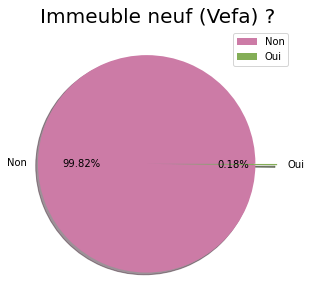

In [25]:
plt.figure(figsize=(5,5))
x=df_selec_2["Immeuble_neuf"].value_counts()
labels=["Non", "Oui"]
plt.pie(x, labels=labels, 
        colors=["#cc7ba6", "#84ae57"], 
        explode=[0.1,0.1], 
        autopct=lambda x : str(round(x,2))+ "%", 
        pctdistance=0.6, 
        shadow=True)
plt.title("Immeuble neuf (Vefa) ?", fontsize=20)
plt.legend(loc="best");

In [26]:
# ANALYSE DE LA VARIABLE "valeurfonc" => prix ou évaluation déclarée dans le cadre d'une mutation onéreuse


In [27]:
pd.set_option('float_format', '{:f}'.format)
df_selec_2["valeurfonc"].describe()

count     56321.000000
mean     495894.859563
std      282144.417323
min           0.000000
25%      320000.000000
50%      436500.000000
75%      600000.000000
max     7650000.000000
Name: valeurfonc, dtype: float64

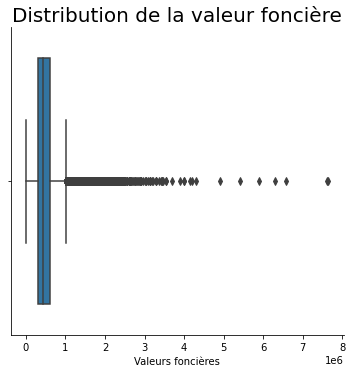

In [28]:
g=sns.catplot(x="valeurfonc", kind="box", data=df_selec_2)
plt.title("Distribution de la valeur foncière", fontsize=20)
plt.xlabel('Valeurs foncières');



In [29]:
df_selec_2[df_selec_2["valeurfonc"]<1000].shape

(22, 57)

In [30]:
df_selec_2[df_selec_2["valeurfonc"]>3500000].shape

(16, 57)

In [31]:
# Suppression des valeurs aberrantes
df_selec_2=df_selec_2[(df_selec_2["valeurfonc"]>1000)&(df_selec_2["valeurfonc"]<3500000)]

In [32]:
pd.set_option('float_format', '{:f}'.format)
df_selec_2["valeurfonc"].describe()

count     56281.000000
mean     494831.665831
std      270753.690662
min        1600.000000
25%      320000.000000
50%      436500.000000
75%      600000.000000
max     3455000.000000
Name: valeurfonc, dtype: float64

In [33]:
df_selec_2["cat_valeur"]=pd.cut(df_selec_2["valeurfonc"], 
bins=[0, 320000, 436600, 600000,3455000], 
labels=["<320k€ €", "Entre 320 & 436k€ €", "Entre 436 & 600k€", ">600k€"])

C:\Users\Anne\AppData\Local\Temp/ipykernel_4312/3510441855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selec_2["cat_valeur"]=pd.cut(df_selec_2["valeurfonc"],


In [34]:
pd.crosstab(df_selec_2["Revente"], df_selec_2["cat_valeur"], normalize=1)

cat_valeur,<320k€ €,Entre 320 & 436k€ €,Entre 436 & 600k€,>600k€
Revente,,,,
0,0.841545,0.827018,0.808431,0.806046
1,0.158455,0.172982,0.191569,0.193954


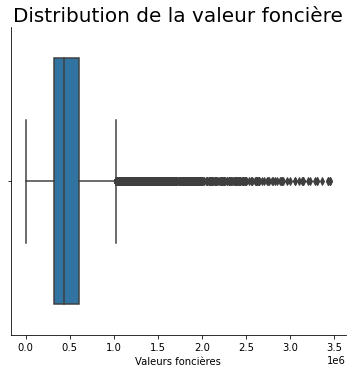

In [35]:
g=sns.catplot(x="valeurfonc", kind="box", data=df_selec_2)
plt.title("Distribution de la valeur foncière", fontsize=20)
plt.xlabel('Valeurs foncières');


In [36]:
# Mémo => Allure = courbe Beta 

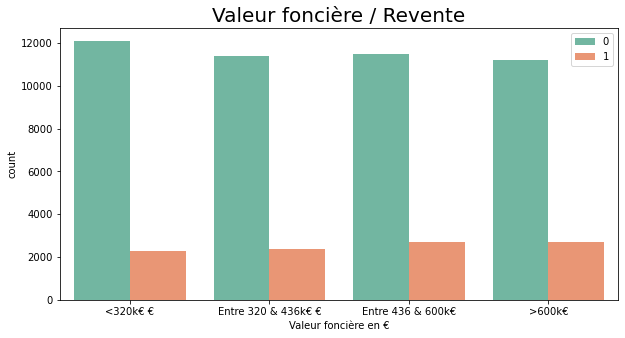

In [37]:
plt.figure(figsize=(10,5))

sns.countplot(x=df_selec_2["cat_valeur"], hue=df_selec_2["Revente"], palette="Set2")
plt.title("Valeur foncière / Revente", fontsize=20)
plt.xlabel('Valeur foncière en €')
plt.legend(loc="best");

In [38]:
g=df_selec_2.groupby("cat_valeur").agg({"Revente":"mean"})

In [39]:
list_valeur=g.index.tolist()
x_ticks=np.arange(len(g))

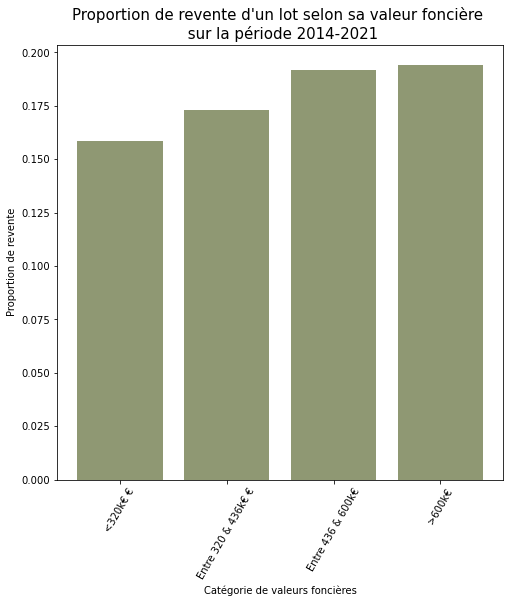

In [40]:
plt.figure(figsize=(8,8))
plt.bar(range(len(g)), g["Revente"], linewidth=5, color="#8f9873")
plt.xticks(x_ticks, list_valeur, rotation=60)
plt.xlabel("Catégorie de valeurs foncières")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot selon sa valeur foncière \n sur la période 2014-2021", fontsize=15);

In [41]:
# Ces 2 graphs ne nous donnent pas d'info. 
# On va plutôt créer une variable sur l'évolution des valeurs foncières d'un même lot entre 2 mutations

df_selec_2[["etaban_lot","valeurfonc","anneemut", "qty_of_mut"]]

,etaban_lot,valeurfonc,anneemut,qty_of_mut
idmutation,,,,
7819827,75102_7167_00001_9,215000.000000,2021,0
7819828,75106_8767_00071_20,1586530.000000,2021,0
7819829,75117_5642_00077_15,701780.000000,2021,0
7819852,75118_2534_00057_11,590140.000000,2021,1
8577053,75118_2534_00057_11,409500.000000,2016,1
...,...,...,...,...
8843146,75104_9783_00027_20,450000.000000,2014,0
8843152,75114_3866_00013_214,678000.000000,2014,0
8843161,75115_3500_00008_1047,462700.000000,2014,0


In [42]:
# On commence par isoler les lots qui ont été revendus pendant la période
t=df_selec_2[df_selec_2["qty_of_mut"]>0][["etaban_lot","anneemut","valeurfonc"]].sort_values(by=["etaban_lot","anneemut"])

In [43]:
t.head()

,etaban_lot,anneemut,valeurfonc
idmutation,,,
8269301,75101_0407_00049_4,2018,660000.000000
8105917,75101_0407_00049_4,2019,853370.000000
8439768,75101_0407_00049_5,2017,660000.000000
8119208,75101_0407_00049_5,2019,880000.000000
8712767,75101_0407_00056_21,2015,200000.000000


In [44]:
# On créé une colonne qui va nous permettre de distinguer la 1ère ligne de mutation (first)
# pour calculer l'évolution des prix sur les autres lignes (not first)

etaban_lot=t["etaban_lot"].iloc[0]
t["range_revente_first"]="not first"

for index, value in enumerate(t["etaban_lot"]) :
    if etaban_lot!=value :
        t["range_revente_first"].iloc[index]="first"
    etaban_lot=value
    print(value)

75101_0407_00049_4
75101_0407_00049_4
75101_0407_00049_5
75101_0407_00049_5
75101_0407_00056_21
75101_0407_00056_21
75101_0407_00056_8
75101_0407_00056_8
75101_1105_00020_48
75101_1105_00020_48
75101_2502_00009_5
75101_2502_00009_5
75101_3392_00003_5
75101_3392_00003_5
75101_4619_00013_57
75101_4619_00013_57
75101_6033_00017_3
75101_6033_00017_3
75101_6249_00020_56
75101_6249_00020_56
75101_6407_00005_113
75101_6407_00005_113
75101_6520_00032_46
75101_6520_00032_46
75101_7279_00005_52
75101_7279_00005_52
75101_7902_00005_49
75101_7902_00005_49
75101_8212_00043_120
75101_8212_00043_120
75101_8212_00056_63
75101_8212_00056_63
75101_8249_00140_27
75101_8249_00140_27
75101_8397_00003_18
75101_8397_00003_18
75101_8623_00013_5
75101_8623_00013_5
75101_8623_00013_7
75101_8623_00013_7
75101_8635_00035_16
75101_8635_00035_16
75101_8635_00089_22
75101_8635_00089_22
75101_8635_00127_108
75101_8635_00127_108
75101_8855_00005_18
75101_8855_00005_18
75101_8894_00039_57
75101_8894_00039_57
75101_8894

C:\Users\Anne\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



75103_9506_00097_36
75103_9506_00117_8
75103_9506_00117_8
75103_9711_00030_8
75103_9711_00030_8
75103_9715_00019_18
75103_9715_00019_18
75103_9715_00022_4
75103_9715_00022_4
75103_9783_00106_23
75103_9783_00106_23
75103_9783_00109_8
75103_9783_00109_8
75103_9783_00117_205
75103_9783_00117_205
75103_9783_00130_19
75103_9783_00130_19
75103_9905_00042_9
75103_9905_00042_9
75103_9905_00043_118
75103_9905_00043_118
75103_9905_00043_118
75103_9905_00050_1
75103_9905_00050_1
75103_9905_00052_14
75103_9905_00052_14
75104_0350_00005_26
75104_0350_00005_26
75104_0420_00015_29
75104_0420_00015_29
75104_0420_00033_38
75104_0420_00033_38
75104_0420_00036_8
75104_0420_00036_8
75104_0420_00036_8
75104_0420_00052_15
75104_0420_00052_15
75104_0420_00052_22
75104_0420_00052_22
75104_0471_00011_3
75104_0471_00011_3
75104_0523_00008_37
75104_0523_00008_37
75104_0523_00008_59
75104_0523_00008_59
75104_0783_00019_5
75104_0783_00019_5
75104_0783_00029_6
75104_0783_00029_6
75104_0978_00007_6
75104_0978_00007

75107_0664_00030_46
75107_0664_00030_46
75107_0664_00042_17
75107_0664_00042_17
75107_0785_00012_25
75107_0785_00012_25
75107_0825_00029_112
75107_0825_00029_112
75107_0991_00007_221
75107_0991_00007_221
75107_1119_00032_3
75107_1119_00032_3
75107_1119_00069_33
75107_1119_00069_33
75107_1120_00009_54
75107_1120_00009_54
75107_1120_00025_101
75107_1120_00025_101
75107_1202_00031_32
75107_1202_00031_32
75107_1202_00052_46
75107_1202_00052_46
75107_1277_00033_38
75107_1277_00033_38
75107_1589_00015_5
75107_1589_00015_5
75107_1717_00037_11
75107_1717_00037_11
75107_1832_00041_27
75107_1832_00041_27
75107_1996_00031_11
75107_1996_00031_11
75107_2017_00007_31
75107_2017_00007_31
75107_2106_00003_19
75107_2106_00003_19
75107_2106_00038_14
75107_2106_00038_14
75107_2106_00056_36
75107_2106_00056_36
75107_2201_00009_11
75107_2201_00009_11
75107_3023_00015_23
75107_3023_00015_23
75107_3065_00014_1
75107_3065_00014_1
75107_3203_00002_1
75107_3203_00002_1
75107_3217_00021_139
75107_3217_00021_139


75109_8299_00032_47
75109_8299_00032_47
75109_8299_00050_73
75109_8299_00050_73
75109_8299_00053_166
75109_8299_00053_166
75109_8392_00008_3
75109_8392_00008_3
75109_8673_00014_13
75109_8673_00014_13
75109_8673_00015_31
75109_8673_00015_31
75109_8673_00028_19
75109_8673_00028_19
75109_8673_00028_63
75109_8673_00028_63
75109_8836_00001_15
75109_8836_00001_15
75109_8836_00001_26
75109_8836_00001_26
75109_9155_00025_32
75109_9155_00025_32
75109_9155_00077_12
75109_9155_00077_12
75109_9439_00024_7
75109_9439_00024_7
75109_9439_00024_8
75109_9439_00024_8
75109_9440_00010_16
75109_9440_00010_16
75109_9440_00013_23
75109_9440_00013_23
75109_9484_00045_19
75109_9484_00045_19
75109_9775_00036_197
75109_9775_00036_197
75109_9866_00009_14
75109_9866_00009_14
75110_0106_00008_8
75110_0106_00008_8
75110_0106_00008_8
75110_0131_00032_16
75110_0131_00032_16
75110_0131_00033_12
75110_0131_00033_12
75110_0131_00033_19
75110_0131_00033_19
75110_0159_00016_7
75110_0159_00016_7
75110_0196_00008_460
75110_

75111_0701_00018_109
75111_0701_00018_109
75111_0813_00012_20
75111_0813_00012_20
75111_0832_00001_14
75111_0832_00001_14
75111_0832_00001_37
75111_0832_00001_37
75111_0832_00011_117
75111_0832_00011_117
75111_0832_00045_118
75111_0832_00045_118
75111_0832_00045_152
75111_0832_00045_152
75111_0933_00016_2
75111_0933_00016_2
75111_1026_00012_8
75111_1026_00012_8
75111_1026_00016_9
75111_1026_00016_9
75111_1103_00008_28
75111_1103_00008_28
75111_1170_00009_18
75111_1170_00009_18
75111_1170_00009_24
75111_1170_00009_24
75111_1170_00009_28
75111_1170_00009_28
75111_1170_00036_62
75111_1170_00036_62
75111_1170_00039_12
75111_1170_00039_12
75111_1237_00011_6
75111_1237_00011_6
75111_1267_00020_35
75111_1267_00020_35
75111_1267_00020_41
75111_1267_00020_41
75111_1267_00022_22
75111_1267_00022_22
75111_1387_00014_61
75111_1387_00014_61
75111_1459_00005_30
75111_1459_00005_30
75111_1459_00012_2
75111_1459_00012_2
75111_1459_00013_20
75111_1459_00013_20
75111_1482_00004_14
75111_1482_00004_14
75

75111_7964_00004_2
75111_7964_00004_2
75111_7964_00004_3
75111_7964_00004_3
75111_8158_00009_18
75111_8158_00009_18
75111_8158_00038_23
75111_8158_00038_23
75111_8158_00051_10
75111_8158_00051_10
75111_8158_00051_15
75111_8158_00051_15
75111_8158_00051_24
75111_8158_00051_24
75111_8158_00051_38
75111_8158_00051_38
75111_8158_00051_9
75111_8158_00051_9
75111_8158_00064_6
75111_8158_00064_6
75111_8158_00065_56
75111_8158_00065_56
75111_8158_00068_86
75111_8158_00068_86
75111_8158_00068_90
75111_8158_00068_90
75111_8158_00107_12
75111_8158_00107_12
75111_8158_00110_114
75111_8158_00110_114
75111_8158_00128_1
75111_8158_00128_1
75111_8158_00128_6
75111_8158_00128_6
75111_8208_00054_6
75111_8208_00054_6
75111_8208_00077_1052
75111_8208_00077_1052
75111_8208_00089_70
75111_8208_00089_70
75111_8208_00090_5
75111_8208_00090_5
75111_8208_00094_17
75111_8208_00094_17
75111_8208_00104_3
75111_8208_00104_3
75111_8208_00104_3
75111_8208_00105_35
75111_8208_00105_35
75111_8208_00106_160
75111_8208_0

75112_9747_00002_17
75112_9747_00002_17
75112_9850_00028_100
75112_9850_00028_100
75112_9850_00056_15
75112_9850_00056_15
75112_9924_00016_61
75112_9924_00016_61
75112_9924_00042_7
75112_9924_00042_7
75112_9952_00003_266
75112_9952_00003_266
75112_9952_00003_64
75112_9952_00003_64
75112_9952_00022_27
75112_9952_00022_27
75112_9952_00026_16
75112_9952_00026_16
75112_9952_00026_19
75112_9952_00026_19
75112_9952_00026_23
75112_9952_00026_23
75112_9952_00030_11
75112_9952_00030_11
75112_9952_00030_20
75112_9952_00030_20
75112_9952_00030_57
75112_9952_00030_57
75112_9952_00036_40
75112_9952_00036_40
75112_9952_00036_67
75112_9952_00036_67
75112_9952_00041_19
75112_9952_00041_19
75112_9952_00058_19
75112_9952_00058_19
75112_9952_00058_3
75112_9952_00058_3
75112_9952_00067_6
75112_9952_00067_6
75113_0114_00016_9
75113_0114_00016_9
75113_0114_00085_14
75113_0114_00085_14
75113_0132_00003_26
75113_0132_00003_26
75113_0132_00004_425
75113_0132_00004_425
75113_0132_00009_170
75113_0132_00009_170


75114_4151_00007_23
75114_4151_00007_23
75114_4151_00011_10
75114_4151_00011_10
75114_4151_00011_3
75114_4151_00011_3
75114_4171_00075_2
75114_4171_00075_2
75114_4418_00006_231
75114_4418_00006_231
75114_4458_00006_2
75114_4458_00006_2
75114_4458_00019_26
75114_4458_00019_26
75114_4458_00050_6
75114_4458_00050_6
75114_4458_00072_8
75114_4458_00072_8
75114_4590_00012_14
75114_4590_00012_14
75114_4590_00016_2
75114_4590_00016_2
75114_4590_00022_29
75114_4590_00022_29
75114_4634_00007_19
75114_4634_00007_19
75114_4634_00027_12
75114_4634_00027_12
75114_4634_00027_4
75114_4634_00027_4
75114_4634_00030_15
75114_4634_00030_15
75114_4808_00025_15
75114_4808_00025_15
75114_4879_00010_37
75114_4879_00010_37
75114_4928_00012_10
75114_4928_00012_10
75114_4928_00012_13
75114_4928_00012_13
75114_4928_00029_80
75114_4928_00029_80
75114_4928_00034_7
75114_4928_00034_7
75114_4928_00035_188
75114_4928_00035_188
75114_4928_00035_69
75114_4928_00035_69
75114_4928_00035_79
75114_4928_00035_79
75114_4928_0

75115_2745_00066_108
75115_2745_00066_108
75115_2830_00009_356
75115_2830_00009_356
75115_2830_00025_139
75115_2830_00025_139
75115_2830_00025_139
75115_2830_00025_69
75115_2830_00025_69
75115_2872_00033_3
75115_2872_00033_3
75115_2890_00024_36
75115_2890_00024_36
75115_2890_00027_36
75115_2890_00027_36
75115_2890_00029_30
75115_2890_00029_30
75115_2890_00034_7
75115_2890_00034_7
75115_2890_00038_32
75115_2890_00038_32
75115_2976_00002_5
75115_2976_00002_5
75115_2976_00004_26
75115_2976_00004_26
75115_3006_00028_9
75115_3006_00028_9
75115_3031_00019_5
75115_3031_00019_5
75115_3031_00024_2
75115_3031_00024_2
75115_3031_00036_9
75115_3031_00036_9
75115_3059_00049_47
75115_3059_00049_47
75115_3059_00056_17
75115_3059_00056_17
75115_3059_00064_5
75115_3059_00064_5
75115_3113_00020_60
75115_3113_00020_60
75115_3132_00007_326
75115_3132_00007_326
75115_3177_00009_12
75115_3177_00009_12
75115_3177_00027_11
75115_3177_00027_11
75115_3177_00027_23
75115_3177_00027_23
75115_3177_00036_12
75115_3

75115_9624_00370_48
75115_9624_00370_48
75115_9624_00374_15
75115_9624_00374_15
75115_9624_00374_233
75115_9624_00374_233
75115_9624_00374_492
75115_9624_00374_492
75115_9624_00374_5
75115_9624_00374_5
75115_9624_00397_157
75115_9624_00397_157
75115_9624_00397_157
75115_9735_00016_11
75115_9735_00016_11
75115_9743_00029_126
75115_9743_00029_126
75115_9743_00029_27
75115_9743_00029_27
75115_9743_00043_10
75115_9743_00043_10
75115_9755_00003_155
75115_9755_00003_155
75115_9755_00003_189
75115_9755_00003_189
75115_9869_00039_17
75115_9869_00039_17
75115_9869_00040_52
75115_9869_00040_52
75115_9869_00043_32
75115_9869_00043_32
75115_9869_00043_98
75115_9869_00043_98
75115_9878_00006_13
75115_9878_00006_13
75115_9878_00006_13
75115_9878_00006_16
75115_9878_00006_16
75115_9902_00022_234
75115_9902_00022_234
75115_9902_00032_131
75115_9902_00032_131
75115_9902_00032_131
75115_9919_00007_1317
75115_9919_00007_1317
75115_9919_00049_5
75115_9919_00049_5
75115_9919_00056_1041
75115_9919_00056_104

75116_7998_00018_5
75116_7998_00018_5
75116_7998_00048_10
75116_7998_00048_10
75116_7998_00048_18
75116_7998_00048_18
75116_8029_00010_29
75116_8029_00010_29
75116_8029_00010_41
75116_8029_00010_41
75116_8029_00018_6
75116_8029_00018_6
75116_8029_00032_27
75116_8029_00032_27
75116_8029_00032_39
75116_8029_00032_39
75116_8029_00037_24
75116_8029_00037_24
75116_8029_00050_28
75116_8029_00050_28
75116_8029_00050_54
75116_8029_00050_54
75116_8029_00050_76
75116_8029_00050_76
75116_8029_00127_198
75116_8029_00127_198
75116_8029_00135_15
75116_8029_00135_15
75116_8059_00098_47
75116_8059_00098_47
75116_8066_00002_20
75116_8066_00002_20
75116_8066_00024_33
75116_8066_00024_33
75116_8066_00032_16
75116_8066_00032_16
75116_8066_00037_18
75116_8066_00037_18
75116_8066_00050_68
75116_8066_00050_68
75116_8066_00056_205
75116_8066_00056_205
75116_8066_00065_7
75116_8066_00065_7
75116_8122_00015_93
75116_8122_00015_93
75116_8141_00008_16
75116_8141_00008_16
75116_8145_00008_3004
75116_8145_00008_300

75117_4907_00023_61
75117_4907_00023_61
75117_5031_00079_11
75117_5031_00079_11
75117_5192_00005_3
75117_5192_00005_3
75117_5192_00008_103
75117_5192_00008_103
75117_5192_00014_3
75117_5192_00014_3
75117_5216_00001_7
75117_5216_00001_7
75117_5228_00005_205
75117_5228_00005_205
75117_5228_00012_52
75117_5228_00012_52
75117_5228_00012_56
75117_5228_00012_56
75117_5228_00012_6
75117_5228_00012_6
75117_5228_00013_47
75117_5228_00013_47
75117_5228_00013_56
75117_5228_00013_56
75117_5228_00013_56
75117_5228_00015_30
75117_5228_00015_30
75117_5228_00017_11
75117_5228_00017_11
75117_5228_00023_8
75117_5228_00023_8
75117_5228_00028_16
75117_5228_00028_16
75117_5228_00028_56
75117_5228_00028_56
75117_5228_00028_62
75117_5228_00028_62
75117_5228_00035_21
75117_5228_00035_21
75117_5228_00035_5
75117_5228_00035_5
75117_5228_00037_17
75117_5228_00037_17
75117_5228_00050_9
75117_5228_00050_9
75117_5228_00071_3
75117_5228_00076_7
75117_5228_00076_7
75117_5228_00082_5
75117_5228_00082_5
75117_5235_0000

75118_1614_00067_47
75118_1614_00067_47
75118_1614_00075_28
75118_1614_00075_28
75118_1614_00105_107
75118_1614_00105_107
75118_1614_00105_112
75118_1614_00105_112
75118_1614_00127_6
75118_1614_00127_6
75118_1614_00127_9
75118_1614_00127_9
75118_1621_00006_46
75118_1621_00006_46
75118_1723_00054_13
75118_1723_00054_13
75118_1723_00054_24
75118_1723_00054_24
75118_1723_00099_12
75118_1723_00099_12
75118_1723_00099_29
75118_1723_00099_29
75118_1723_00119_19
75118_1723_00119_19
75118_1723_00119_21
75118_1723_00119_21
75118_1723_00133_3
75118_1723_00133_3
75118_1723_00136_1015
75118_1723_00136_1015
75118_1723_00136_1206
75118_1723_00136_1206
75118_1723_00136_1230
75118_1723_00136_1230
75118_1723_00136_1864
75118_1723_00136_1864
75118_1723_00136_1964
75118_1723_00136_1964
75118_1723_00136_1973
75118_1723_00136_1973
75118_1723_00136_1992
75118_1723_00136_1992
75118_1723_00154_123
75118_1723_00154_123
75118_1723_00154_41
75118_1723_00154_41
75118_1723_00154_48
75118_1723_00154_48
75118_1723_0

In [45]:
t["range_revente_first"].value_counts()

not first    5128
first        4955
Name: range_revente_first, dtype: int64

In [46]:
t.head()

,etaban_lot,anneemut,valeurfonc,range_revente_first
idmutation,,,,
8269301,75101_0407_00049_4,2018,660000.000000,not first
8105917,75101_0407_00049_4,2019,853370.000000,not first
8439768,75101_0407_00049_5,2017,660000.000000,first
8119208,75101_0407_00049_5,2019,880000.000000,not first
8712767,75101_0407_00056_21,2015,200000.000000,first


In [47]:
# Renommer la valeur de "range_revente_first" en 1ère ligne du df pq elle a servi à la mise en place du compteur
# Elle était donc restée en "not first"

t["range_revente_first"].iloc[0]="first"

C:\Users\Anne\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [48]:
t["Evol_val"]=t["valeurfonc"].pct_change()

In [49]:
t.head()

,etaban_lot,anneemut,valeurfonc,range_revente_first,Evol_val
idmutation,,,,,
8269301,75101_0407_00049_4,2018,660000.000000,first,NaN
8105917,75101_0407_00049_4,2019,853370.000000,not first,0.292985
8439768,75101_0407_00049_5,2017,660000.000000,first,-0.226596
8119208,75101_0407_00049_5,2019,880000.000000,not first,0.333333
8712767,75101_0407_00056_21,2015,200000.000000,first,-0.772727


In [50]:
t["Evol_val"][t["range_revente_first"]=="first"]=0

C:\Users\Anne\AppData\Local\Temp/ipykernel_4312/1423447727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t["Evol_val"][t["range_revente_first"]=="first"]=0


In [51]:
t.head()

,etaban_lot,anneemut,valeurfonc,range_revente_first,Evol_val
idmutation,,,,,
8269301,75101_0407_00049_4,2018,660000.000000,first,0.000000
8105917,75101_0407_00049_4,2019,853370.000000,not first,0.292985
8439768,75101_0407_00049_5,2017,660000.000000,first,0.000000
8119208,75101_0407_00049_5,2019,880000.000000,not first,0.333333
8712767,75101_0407_00056_21,2015,200000.000000,first,0.000000


In [52]:
t=t[["range_revente_first","Evol_val"]]

In [53]:
t

,range_revente_first,Evol_val
idmutation,,
8269301,first,0.000000
8105917,not first,0.292985
8439768,first,0.000000
8119208,not first,0.333333
8712767,first,0.000000
...,...,...
8285726,not first,0.708750
8418100,first,0.000000
8140774,not first,0.337500


In [54]:
df_selec_2=df_selec_2.merge(right=t, on="idmutation", how="left")

In [55]:
df_selec_2[["etaban_lot","anneemut","valeurfonc","range_revente_first", "Evol_val"]].sort_values(by=["etaban_lot","anneemut"])

,etaban_lot,anneemut,valeurfonc,range_revente_first,Evol_val
idmutation,,,,,
8696331,75101_0407_00047_3,2015,210000.000000,NaN,NaN
8684696,75101_0407_00048_11,2015,457460.000000,NaN,NaN
8707053,75101_0407_00048_15,2015,465460.000000,NaN,NaN
8559654,75101_0407_00048_28,2016,467600.000000,NaN,NaN
8712568,75101_0407_00048_29,2015,505460.000000,NaN,NaN
...,...,...,...,...,...
8584854,75118_9854_00021_7,2016,190000.000000,NaN,NaN
8818796,75118_9854_00023_15,2014,150000.000000,NaN,NaN
8578190,75118_9854_00023_2,2016,267400.000000,NaN,NaN


In [56]:
df_selec_2["Evol_val"]=df_selec_2["Evol_val"].fillna(0)

In [57]:
# On obtient donc une variable Evol_val qui sera à :
# - 0 pour tous les lots qui n'ont pas été revendus
# - 0 pour la 1ère mutation des lots qui ont été revendus
# - % d'augmentation pour les mutations suivantes des lots qui ont été revendus

In [58]:
# Pour dataviz, on isole les "not first"
g=df_selec_2[(df_selec_2["qty_of_mut"]>0)&(df_selec_2["range_revente_first"]=="not first")]


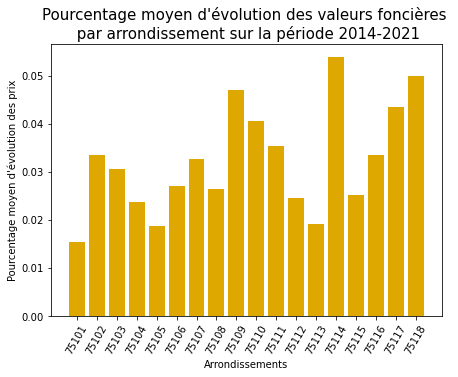

In [59]:
g=df_selec_2.groupby("l_codinsee").agg({"Evol_val":"mean"})

list_arrond=g.index.tolist()
x_ticks=np.arange(len(g))

plt.figure(figsize=(7,5))
plt.bar(range(len(g)), g["Evol_val"], linewidth=5, color="#dfa801")
plt.xticks(x_ticks, list_arrond, rotation=60)
plt.xlabel("Arrondissements")
plt.ylabel("Pourcentage moyen d'évolution des prix")
plt.title("Pourcentage moyen d'évolution des valeurs foncières \n par arrondissement sur la période 2014-2021", fontsize=15);


In [60]:
# ANALYSE DE LA VARIABLE "nblot" +> nombre total de lots dans la mutation
df_selec_2["nblot"].value_counts()


2     27556
1     19359
3      7813
4      1044
5       307
6       111
7        41
8        24
9         9
14        5
10        4
18        3
12        2
13        1
11        1
15        1
Name: nblot, dtype: int64

In [61]:
#regroupement des catégories > 3

def filtre (x) :
    if x >3 :
        return ">3"
    else :
        return x
    
df_selec_2["nblot"]=df_selec_2["nblot"].apply(filtre)


In [62]:
df_selec_2["nblot"].value_counts()

2     27556
1     19359
3      7813
>3     1553
Name: nblot, dtype: int64

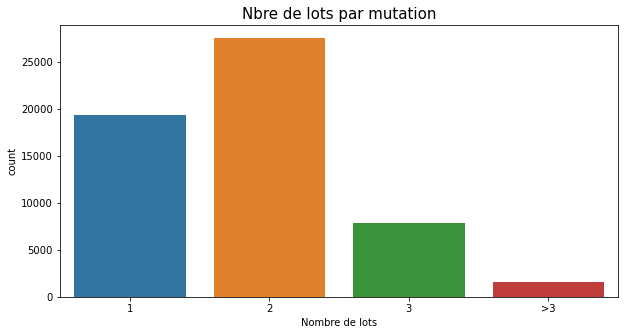

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x='nblot', data=df_selec_2)
plt.title("Nbre de lots par mutation", fontsize=15)
plt.xlabel('Nombre de lots');


In [64]:
# ANALYSE DE LA VARIABLE "nbcomm" +> nombre de communes concernées par la mutation
df_selec_2["nbcomm"].value_counts()

1    56281
Name: nbcomm, dtype: int64

In [65]:
# Aucun intérêt. Suppression de cette variable

df_selec_2=df_selec_2.drop("nbcomm", axis=1)

In [66]:
# ANALYSE DE LA VARIABLE "l_codinsee" +> liste des codes INSEE des communes concernées par la mutation
df_selec_2["l_codinsee"].value_counts()

75115    7788
75111    6418
75116    5590
75117    5469
75114    4484
75110    3755
75113    3565
75112    3422
75118    3387
75109    2081
75105    1901
75103    1780
75106    1500
75107    1458
75104    1209
75108    1097
75102     899
75101     478
Name: l_codinsee, dtype: int64

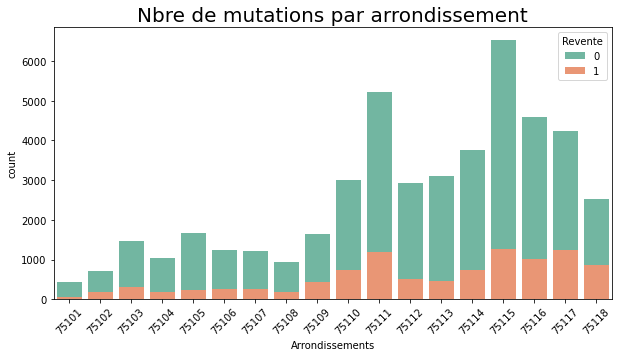

In [67]:
plt.figure(figsize=(10,5))

sns.countplot(x='l_codinsee', hue="Revente", data=df_selec_2, palette="Set2", dodge=False)
plt.title("Nbre de mutations par arrondissement", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Arrondissements');

In [68]:
df_selec_2["Revente"]=df_selec_2["Revente"].replace({"non":0, "oui":1})
g=df_selec_2.groupby("l_codinsee").agg({"Revente":"mean"})
g

,Revente
l_codinsee,
75101,0.112971
75102,0.206897
75103,0.176404
75104,0.148883
75105,0.128353
75106,0.168667
75107,0.170782
75108,0.154057
75109,0.206151


In [69]:
list_arrond=g.index.tolist()
x_ticks=np.arange(len(g))

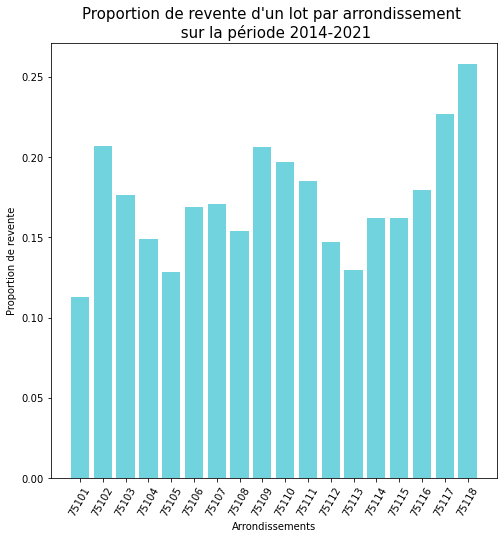

In [70]:

plt.figure(figsize=(8,8))
plt.bar(range(len(g)), g["Revente"], linewidth=5, color="#71d3de")
plt.xticks(x_ticks, list_arrond, rotation=60)
plt.xlabel("Arrondissements")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot par arrondissement \n sur la période 2014-2021", fontsize=15);


In [71]:
# ANALYSE DE LA VARIABLE "nblocapt" +> nombre d'appartements ayant muté
df_selec_2["nblocapt"].value_counts()


1    56281
Name: nblocapt, dtype: int64

In [72]:
# Aucun intérêt. Suppression de cette variable
df_selec_2=df_selec_2.drop("nblocapt", axis=1)

In [73]:
# ANALYSE DE LA VARIABLE "nblocdep" +> nombre de dépendances ayant muté
df_selec_2["nblocdep"].value_counts()


0     45981
1      9300
2       862
3       107
4        20
6         3
5         2
7         2
12        1
9         1
14        1
8         1
Name: nblocdep, dtype: int64

In [74]:
#regroupement des catégories > 1

def filtre (x) :
    if x >1 :
        return ">1"
    else :
        return x
    
df_selec_2["nblocdep"]=df_selec_2["nblocdep"].apply(filtre)


In [75]:
df_selec_2["nblocdep"].value_counts()

0     45981
1      9300
>1     1000
Name: nblocdep, dtype: int64

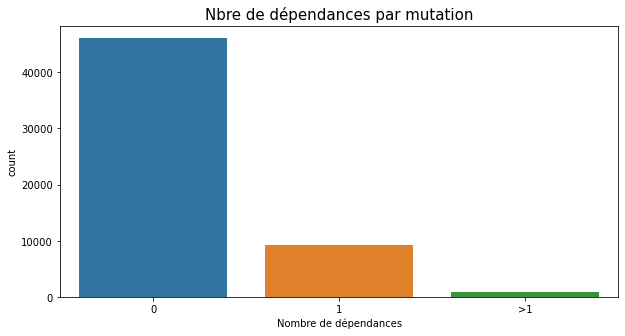

In [76]:
plt.figure(figsize=(10,5))
sns.countplot(x='nblocdep', data=df_selec_2)
plt.title("Nbre de dépendances par mutation", fontsize=15)
plt.xlabel('Nombre de dépendances');


In [77]:
 # ANALYSE DE LA VARIABLE "nbapt2pp" +> nombre d'appartements avec 2 pièces principales ayant muté
df_selec_2["nbapt2pp"].value_counts()


1    33685
0    22596
Name: nbapt2pp, dtype: int64

In [78]:
df_selec_2["nbapt2pp"].unique()

array([1, 0], dtype=int64)

In [79]:
 # ANALYSE DE LA VARIABLE "nbapt3pp" +> nombre d'appartements avec 3 pièces principales ayant muté
df_selec_2["nbapt3pp"].value_counts()


0    33685
1    22596
Name: nbapt3pp, dtype: int64

In [80]:
# Pour la Viz, on va regrouper "nbapt2pp" et "nbapt3pp" => "type appart"

df_selec_2=df_selec_2.rename({"nbapt2pp":"Type appart"}, axis=1)

In [81]:
df_selec_2["Type appart"]

idmutation
7819827    1
7819828    1
7819829    1
7819852    0
8577053    0
          ..
8843146    1
8843152    0
8843161    1
8843163    1
8843171    1
Name: Type appart, Length: 56281, dtype: int64

In [82]:
df_selec_2["Type appart"]=df_selec_2["Type appart"].replace({0:"3P", 1:"2P"})

In [83]:
df_selec_2["Type appart"]

idmutation
7819827    2P
7819828    2P
7819829    2P
7819852    3P
8577053    3P
           ..
8843146    2P
8843152    3P
8843161    2P
8843163    2P
8843171    2P
Name: Type appart, Length: 56281, dtype: object

In [84]:
# Suppression de la variable "nbapt3pp"  
df_selec_2=df_selec_2.drop("nbapt3pp", axis=1)

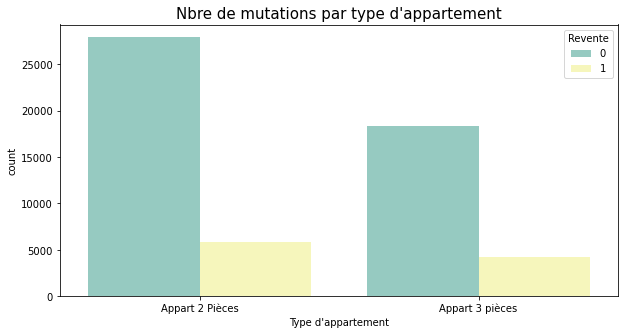

In [85]:
plt.figure(figsize=(10,5))

sns.countplot(x='Type appart', hue="Revente", data=df_selec_2, palette="Set3")
plt.title("Nbre de mutations par type d'appartement", fontsize=15)
plt.xlabel("Type d'appartement")
plt.xticks ([0,1], ["Appart 2 Pièces", "Appart 3 pièces"]);

In [86]:
g=df_selec_2.groupby("Type appart").agg({"Revente":"mean"})
g


,Revente
Type appart,
2P,0.172421
3P,0.189193


In [87]:
list_appart=g.index.tolist()
x_ticks=np.arange(len(g))

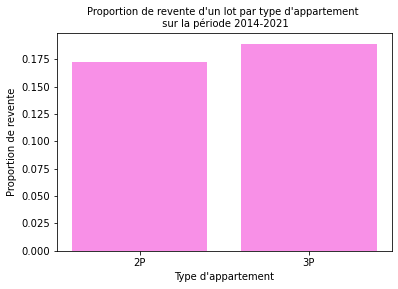

In [88]:
plt.figure()
plt.bar(range(len(g)), g["Revente"], color="#f890e7")
plt.xticks(x_ticks, list_appart)
plt.xlabel("Type d'appartement")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot par type d'appartement \n sur la période 2014-2021", fontsize=10);

In [89]:
# ANALYSE DE LA VARIABLE "sbati" +> surface de l'ensemble du bâti ayant muté
df_selec_2["sbati"].value_counts()


50     1975
40     1956
30     1730
45     1694
35     1624
       ... 
190       1
166       1
192       1
350       1
214       1
Name: sbati, Length: 180, dtype: int64

In [90]:
# ANALYSE DE LA VARIABLE "sbatapt" +> surface de l'ensemble du bâti ayant muté
df_selec_2["sbatapt"].value_counts()


50     1975
40     1956
30     1730
45     1694
35     1624
       ... 
190       1
166       1
192       1
350       1
214       1
Name: sbatapt, Length: 180, dtype: int64

In [91]:
# Ces 2 variables donnent les mêmes infos. Suppression de l'une
df_selec_2=df_selec_2.drop("sbati", axis=1)

In [92]:
# ANALYSE DE LA VARIABLE "sbatact" +> surface de l'ensemble du bâti ayant muté
df_selec_2["sbatact"].value_counts()


0    56281
Name: sbatact, dtype: int64

In [93]:
# Pas d'intérêt => suppression
df_selec_2=df_selec_2.drop("sbatact", axis=1)

In [94]:
# ANALYSE DE LA VARIABLE "sapt2pp" +> surface de l'ensemble du bâti ayant muté
df_selec_2["sapt2pp"].value_counts()


0      22596
30      1654
40      1576
35      1488
32      1189
       ...  
149        1
140        1
131        1
135        1
214        1
Name: sapt2pp, Length: 141, dtype: int64

In [95]:
# ANALYSE DE LA VARIABLE "sapt3pp" +> surface de l'ensemble du bâti ayant muté
df_selec_2["sapt3pp"].value_counts()

0      33685
60       936
50       850
70       772
55       728
       ...  
177        1
166        1
17         1
192        1
384        1
Name: sapt3pp, Length: 166, dtype: int64

In [96]:
# Addition des 2 variables
df_selec_2["surface_appart"]=df_selec_2["sapt2pp"]+df_selec_2["sapt3pp"]

In [97]:
#Comparaison "surface_appart" et "sbatapt"

compar=df_selec_2["surface_appart"]-df_selec_2["sbatapt"]
compar.sum()

0

In [98]:
#Suppression de "sbatapt", "sapt2pp", "sapt3pp"
df_selec_2=df_selec_2.drop("sbatapt", axis=1)
df_selec_2=df_selec_2.drop("sapt2pp", axis=1)
df_selec_2=df_selec_2.drop("sapt3pp", axis=1)

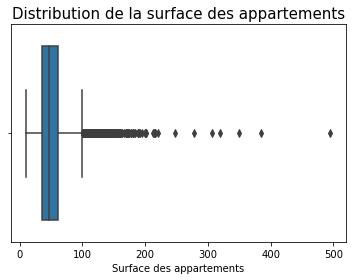

In [99]:
sns.boxplot(x="surface_appart", data=df_selec_2)
plt.title("Distribution de la surface des appartements", fontsize=15)
plt.xlabel('Surface des appartements');

In [100]:
df_selec_2[df_selec_2["surface_appart"]>220].shape

(7, 53)

In [101]:
# Suppression valeurs aberrantes
df_selec_2=df_selec_2[df_selec_2["surface_appart"]<220]


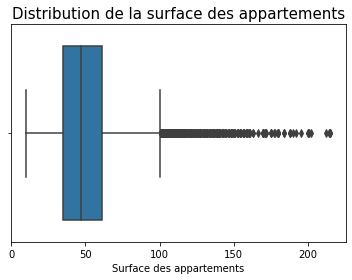

In [102]:
sns.boxplot(x="surface_appart", data=df_selec_2)
plt.title("Distribution de la surface des appartements", fontsize=15)
plt.xlabel('Surface des appartements');

In [103]:
# ANALYSE DE LA VARIABLE "scarrez" +> Surface Loi Carrez du lot
df_selec_2["scarrez"].describe()



count   56273.000000
mean       49.985045
std        39.194099
min         0.000000
25%        35.250000
50%        46.760000
75%        60.800000
max      7036.000000
Name: scarrez, dtype: float64

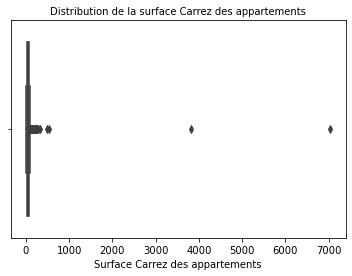

In [104]:
sns.boxplot(x = 'scarrez', data = df_selec_2)
plt.title("Distribution de la surface Carrez des appartements", fontsize=10)
plt.xlabel('Surface Carrez des appartements');

In [105]:
df_selec_2[df_selec_2["scarrez"]==0].shape

(17, 53)

In [106]:
df_selec_2[df_selec_2["scarrez"]>220].shape

(10, 53)

In [107]:
#Suppression des valeurs aberrantes

In [108]:
df_selec_2=df_selec_2[(df_selec_2["scarrez"]>0)&(df_selec_2["scarrez"]<220)]

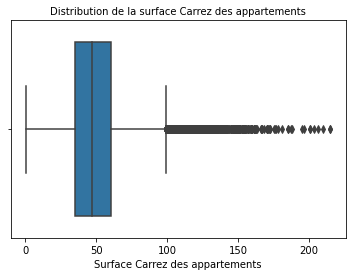

In [109]:
sns.boxplot(x = 'scarrez', data = df_selec_2)
plt.title("Distribution de la surface Carrez des appartements", fontsize=10)
plt.xlabel('Surface Carrez des appartements');

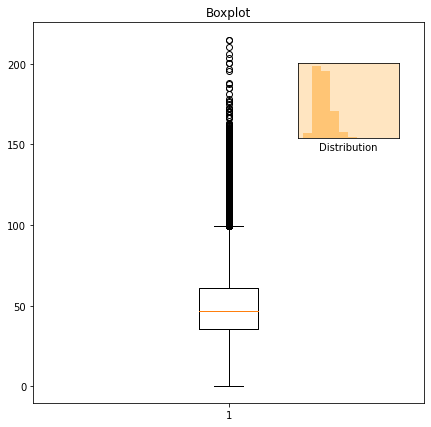

In [110]:
plt.figure(figsize = (7,7))
plt.boxplot(df_selec_2["scarrez"])
plt.title( 'Boxplot')
plt.axes([0.65, 0.65, 0.2, 0.15], facecolor='#ffe5c1')
plt.hist(df_selec_2["scarrez"], color='#FFC575')
plt.xlabel('Distribution')
plt.xticks([])
plt.yticks([]);

In [111]:
# Chercher un moyen de représenter la différence entre surface appart et scarrez !!!!!!!!!!!!!!
# Soit regarder la différence entre les 2 soit le rapport
# Faire un graph avec les axes scatterplot avec x = scarrez, y=surface, et y'= scarrez pour avoir la ligne "identité" qui sera une diagonale. 

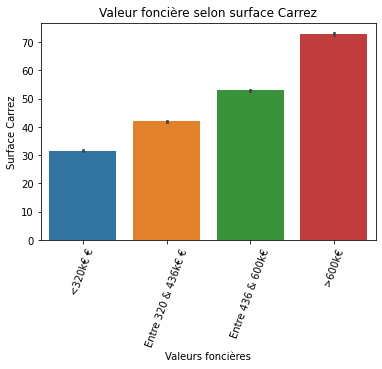

In [112]:
sns.barplot(x = df_selec_2["cat_valeur"], y = df_selec_2["scarrez"])
plt.title("Valeur foncière selon surface Carrez")
plt.xticks(rotation=70)
plt.xlabel("Valeurs foncières")
plt.ylabel("Surface Carrez");

In [113]:
# Il vaut mieux faire un scatter plot pour avoir la tendance

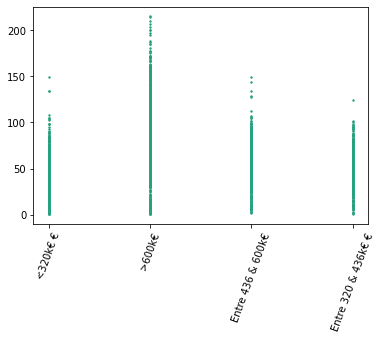

In [114]:
plt.figure()
plt.scatter(x=df_selec_2["cat_valeur"], y=df_selec_2["scarrez"], color="#28a27e", s=2)
plt.xticks(rotation=70);


In [115]:
# ANALYSE DE LA VARIABLE  "anarnc202012_nb_log"=> Nombre de logements dans le bâtiment
df_selec_2["anarnc202012_nb_log"].describe()



count   56246.000000
mean       38.528416
std       104.396670
min         0.000000
25%        13.000000
50%        20.000000
75%        34.000000
max      4791.000000
Name: anarnc202012_nb_log, dtype: float64

In [116]:
df_selec_2["anarnc202012_nb_log"].isna().sum()

0

In [117]:
df_selec_2["anarnc202012_nb_log"].median()

20.0

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


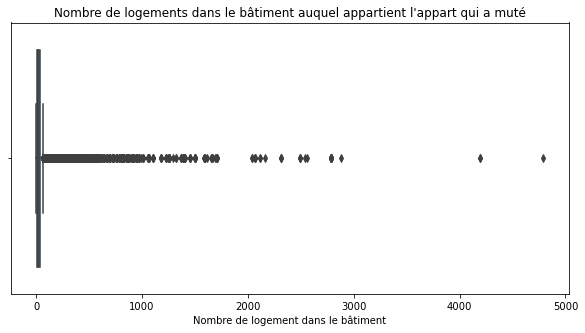

In [118]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec_2["anarnc202012_nb_log"])
plt.title("Nombre de logements dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre de logement dans le bâtiment");

In [119]:
df_selec_2[df_selec_2["anarnc202012_nb_log"]==0].shape

(805, 53)

In [120]:
df_selec_2[df_selec_2["anarnc202012_nb_log"]==1].shape

(200, 53)

In [121]:
df_selec_2[(df_selec_2["anarnc202012_nb_log"]>1) & (df_selec_2["anarnc202012_nb_log"]<100)].median()

C:\Users\Anne\AppData\Local\Temp/ipykernel_4312/4177864215.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_selec_2[(df_selec_2["anarnc202012_nb_log"]>1) & (df_selec_2["anarnc202012_nb_log"]<100)].median()


qty_of_mut                                         0.000000
Revente                                            0.000000
anneemut                                        2017.000000
moismut                                            7.000000
Immeuble_neuf                                      0.000000
valeurfonc                                    438000.000000
l_codinsee                                     75113.000000
scarrez                                           46.800000
anarnc202012_nb_log                               20.000000
anarnc202012_nb_lot_garpark                        0.000000
anarnc202012_nb_lot_tertiaire                     19.000000
anarnc202012_nb_lot_tot                           35.000000
adedpe202006_logtype_perc_surf_vitree_ext          0.254000
adedpe202006_logtype_presence_balcon               0.000000
adedpe202006_logtype_presence_climatisation        0.000000
ancqpv201410_is_qpv                                0.000000
cerffo2020_nb_log                       

In [122]:
df_selec_2[(df_selec_2["anarnc202012_nb_log"]>0) & (df_selec_2["anarnc202012_nb_log"]<1)].shape

(166, 53)

In [123]:
df_selec_2[df_selec_2["anarnc202012_nb_log"]>2500].shape

(18, 53)

In [124]:
# Suppression des valeurs aberrantes
df_selec_2=df_selec_2[(df_selec_2["anarnc202012_nb_log"]>=1)&(df_selec_2["anarnc202012_nb_log"]<2500)]

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


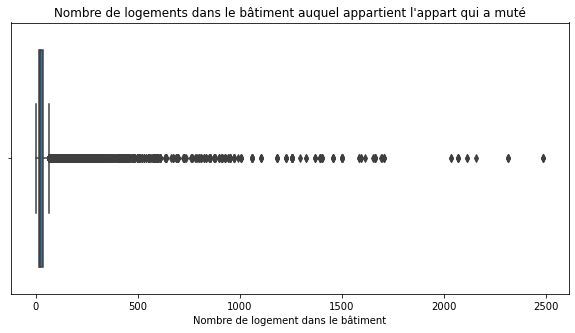

In [125]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec_2["anarnc202012_nb_log"])
plt.title("Nombre de logements dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre de logement dans le bâtiment");

In [126]:
# CREATION d'UNE VARIABLE TAILLECOPRO
# Partir sur une autre répartition que sur les quartiles 
# pq avec les quartiles on a une répartition =  entre les classes
# https://www.anah.fr/fileadmin/anah/Mediatheque/Publications/Les_etudes/anah_etude_enl_copro-vbat_pap.pdf

def filtre (x) :
    if x<=13 :
        return "Petite"
    elif x >13 and x<=20 :
        return "Moyenne"
    elif x >20 and x<=34 :
        return "Grande"
    else : 
        return "Très grande"

df_selec_2["Taille_copro"]=df_selec_2["anarnc202012_nb_log"].apply(filtre)


In [127]:
df_selec_2["Taille_copro"].value_counts()

Petite         14803
Grande         14153
Très grande    13549
Moyenne        12752
Name: Taille_copro, dtype: int64

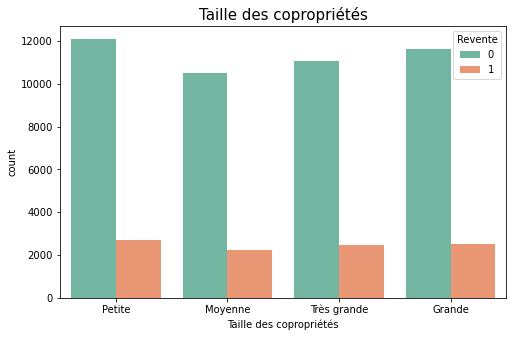

In [128]:
plt.figure(figsize=(8,5))

sns.countplot(x='Taille_copro', hue="Revente", data=df_selec_2, palette="Set2")
plt.title("Taille des copropriétés", fontsize=15)
plt.xlabel("Taille des copropriétés");


In [129]:
g=df_selec_2.groupby("Taille_copro").agg({"Revente":"mean"})
g

,Revente
Taille_copro,
Grande,0.179255
Moyenne,0.174796
Petite,0.182328
Très grande,0.181489


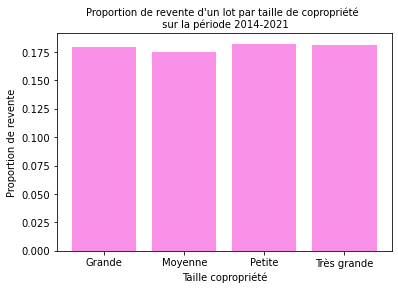

In [130]:
list_copro=g.index.tolist()
x_ticks=np.arange(len(g))

plt.figure()
plt.bar(range(len(g)), g["Revente"], color="#f890e8")
plt.xticks(x_ticks, list_copro)
plt.xlabel("Taille copropriété")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot par taille de copropriété \n sur la période 2014-2021", fontsize=10);

In [131]:
# ANALYSE DE LA VARIABLE  "anarnc202012_nb_lot_garpark"=> (rnc) Nombre de lots de stationnement dans le bâtiment
df_selec_2["anarnc202012_nb_lot_garpark"].describe()


count   55257.000000
mean        9.893402
std        57.395210
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3513.000000
Name: anarnc202012_nb_lot_garpark, dtype: float64

In [132]:
df_selec_2[df_selec_2["anarnc202012_nb_lot_garpark"]==0].shape

(44444, 54)

In [133]:
# 80% des appts n'ont pas de parking ce qui ne me semble pas improbable dans Paris

In [134]:
df_selec_2["anarnc202012_nb_lot_garpark"].isna().sum()

0

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


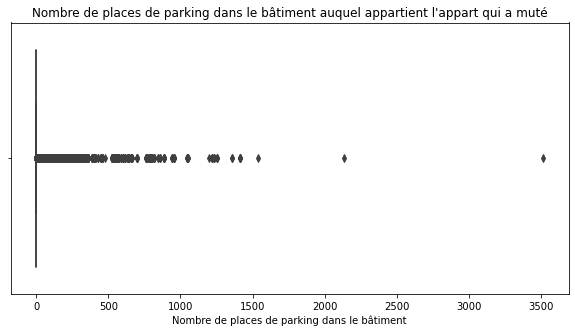

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec_2["anarnc202012_nb_lot_garpark"])
plt.title("Nombre de places de parking dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre de places de parking dans le bâtiment");

In [136]:
df_selec_2[df_selec_2["anarnc202012_nb_lot_garpark"]>1500].shape

(3, 54)

In [137]:
# Suppression des valeurs aberrantes
df_selec_2=df_selec_2[(df_selec_2["anarnc202012_nb_lot_garpark"]<1500)]

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


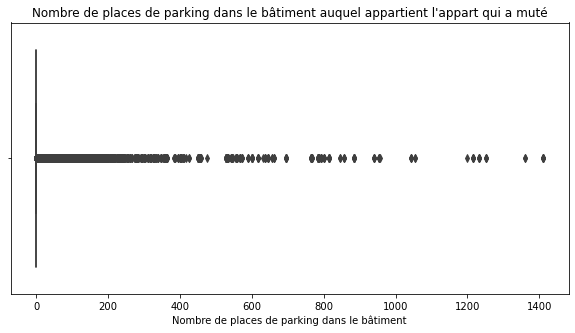

In [138]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec_2["anarnc202012_nb_lot_garpark"])
plt.title("Nombre de places de parking dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre de places de parking dans le bâtiment");


In [139]:
# ANALYSE DE LA VARIABLE  "anarnc202012_nb_lot_tertiaire"=>(rnc) Nombre de lots de type bureau et commerce dans le bâtiment
df_selec_2["anarnc202012_nb_lot_tertiaire"].describe()

count   55254.000000
mean       34.124559
std        84.683462
min         0.000000
25%         6.500000
50%        19.000000
75%        34.000000
max      2464.000000
Name: anarnc202012_nb_lot_tertiaire, dtype: float64

In [140]:
df_selec_2["anarnc202012_nb_lot_tertiaire"].isna().sum()

0

In [141]:
df_selec_2[df_selec_2["anarnc202012_nb_lot_tertiaire"]==0].shape

(12815, 54)

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


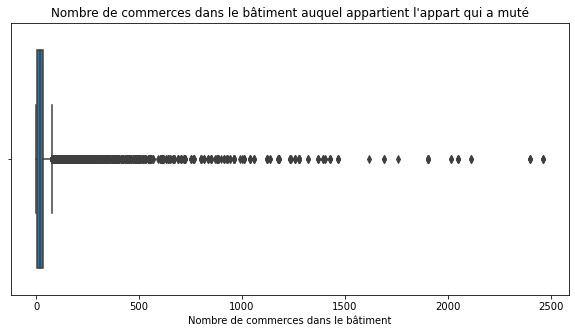

In [142]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec_2["anarnc202012_nb_lot_tertiaire"])
plt.title("Nombre de commerces dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre de commerces dans le bâtiment");

In [143]:
df_selec_2[df_selec_2["anarnc202012_nb_lot_tertiaire"]>2000].shape

(14, 54)

In [144]:
# Suppression des valeurs aberrantes
df_selec_2=df_selec_2[(df_selec_2["anarnc202012_nb_lot_tertiaire"]<2000)]

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


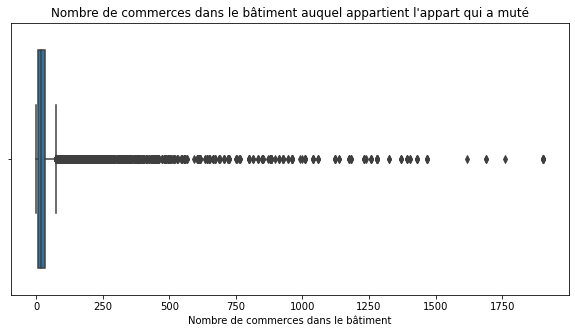

In [145]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec_2["anarnc202012_nb_lot_tertiaire"])
plt.title("Nombre de commerces dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre de commerces dans le bâtiment");

In [146]:
# DECISION PRISE DE SUPPRIMER LA VARIABLE anarnc202012_nb_lot_tertiaire 
# qui n'apporte rien à la modélisation. On va s'intéresser plutôt aux type d'équipement bruyant

df_selec_2=df_selec_2.drop("anarnc202012_nb_lot_tertiaire", axis=1)

In [147]:
# ANALYSE DE LA VARIABLE  "anarnc202012_nb_lot_tot"=>(rnc) Nombre total de lots dans le bâtiment
df_selec_2["anarnc202012_nb_lot_tot"].describe()

count   55240.000000
mean       73.375647
std       176.276429
min         0.000000
25%        23.000000
50%        37.000000
75%        62.000000
max      7264.000000
Name: anarnc202012_nb_lot_tot, dtype: float64

In [148]:
df_selec_2["anarnc202012_nb_lot_tot"].isna().sum()

0

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


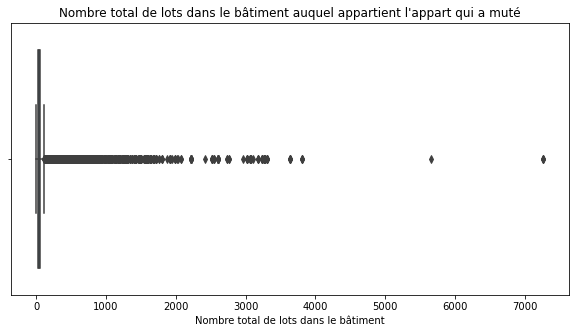

In [149]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec_2["anarnc202012_nb_lot_tot"])
plt.title("Nombre total de lots dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre total de lots dans le bâtiment");

In [150]:
df_selec_2[df_selec_2["anarnc202012_nb_lot_tot"]==0].shape

(5, 53)

In [151]:
df_selec_2[df_selec_2["anarnc202012_nb_lot_tot"]>3500].shape

(11, 53)

In [152]:
# Suppression des valeurs aberrantes
df_selec_2=df_selec_2[(df_selec_2["anarnc202012_nb_lot_tot"]>=1)&(df_selec_2["anarnc202012_nb_lot_tot"]<3500)]


C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


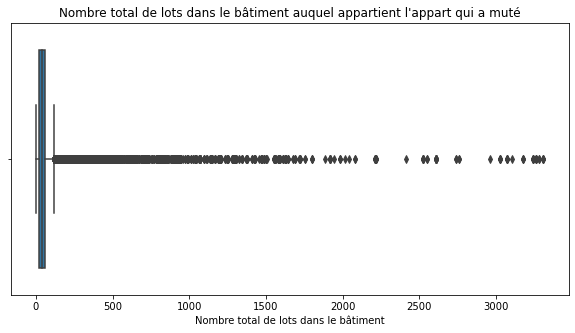

In [153]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec_2["anarnc202012_nb_lot_tot"])
plt.title("Nombre total de lots dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre total de lots dans le bâtiment");

In [154]:
# Création d'une variable pour connaitre le ratio de place de parking par logement dans l'immeuble

df_selec_2["ratio_log_park"]=df_selec_2["anarnc202012_nb_log"]/df_selec_2["anarnc202012_nb_lot_garpark"]


In [155]:
def filtre(x) :
    if x > 1 :
        return "pas de parking pour tous"
    elif x==1 :
        return "parking"
    else :
        return "plus de parking que d'appart"
    
df_selec_2["park_log"]=df_selec_2["ratio_log_park"].apply(filtre)
df_selec_2["park_log"].value_counts()

pas de parking pour tous        51822
plus de parking que d'appart     2970
parking                           403
Name: park_log, dtype: int64

In [156]:
df_selec_2.groupby(["Type appart", "park_log"]).agg({"park_log":"count"})


park_log
Type appart park_log                              
2P          parking                            245
            pas de parking pour tous         31044
            plus de parking que d'appart      1767
3P          parking                            158
            pas de parking pour tous         20778
            plus de parking que d'appart      1203

In [157]:
# Au final, il ne nous sera pas possible de savoir si l'appart concerné par la mutation a ou non un parking...
# on supprime cette variable "ratio_log_park", "park_log"  et "anarnc202012_nb_lot_garpark"

df_selec_2=df_selec_2.drop(["ratio_log_park", "park_log","anarnc202012_nb_lot_garpark"], axis=1)

In [158]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_baie_orientation"=>dpe) Orientations des vitrages d'un logement représentatif du bâtiment
df_selec_2["adedpe202006_logtype_baie_orientation"].value_counts(ascending=False)



nord     18536
est       4885
sud       4583
ouest     3732
Name: adedpe202006_logtype_baie_orientation, dtype: int64

In [159]:
df_selec_2["adedpe202006_logtype_baie_orientation"].isna().sum()

23459

In [160]:
# remplacement des Nan par une classe inconnue
df_selec_2["adedpe202006_logtype_baie_orientation"]=df_selec_2["adedpe202006_logtype_baie_orientation"].fillna("unknown")
df_selec_2["adedpe202006_logtype_baie_orientation"].value_counts(ascending=False)

unknown    23459
nord       18536
est         4885
sud         4583
ouest       3732
Name: adedpe202006_logtype_baie_orientation, dtype: int64

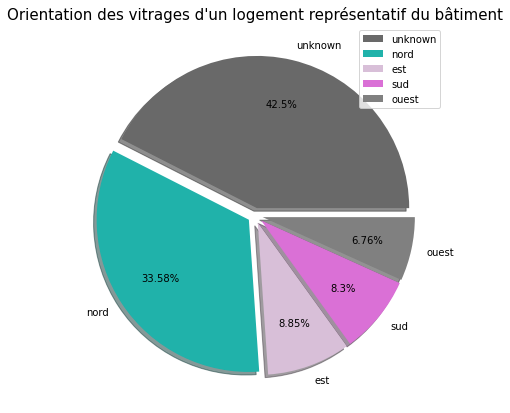

In [161]:
plt.figure(figsize=(7,7))
x=df_selec_2["adedpe202006_logtype_baie_orientation"].value_counts()
labels=df_selec_2["adedpe202006_logtype_baie_orientation"].value_counts().index
plt.pie(x, labels=labels, 
        colors=["dimgray", "lightseagreen", "thistle", "orchid", "grey"], 
        explode=[0.05,0.05,0.05,0.05, 0.05],
        autopct=lambda x : str(round(x,2))+ "%", 
        pctdistance=0.7, 
        shadow=True)
plt.title("Orientation des vitrages d'un logement représentatif du bâtiment", fontsize=15)
plt.legend(loc="best");

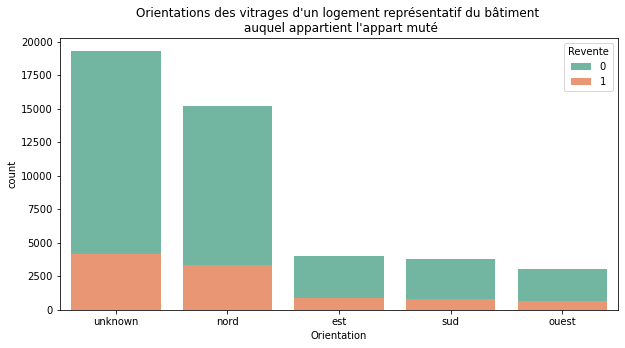

In [162]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_baie_orientation', data=df_selec_2, hue="Revente", palette="Set2", dodge=False)
plt.title("Orientations des vitrages d'un logement représentatif du bâtiment \n auquel appartient l'appart muté")
plt.xlabel("Orientation");

In [163]:
# Faire 2 camemberts : un avec y = 1 et un avec y=0

In [164]:
# On supprime la variable pq concerne un logement représentatif du bâtiment

df_selec_2=df_selec_2.drop("adedpe202006_logtype_baie_orientation", axis=1)

In [165]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_baie_type_vitrage"=>dpe)  vitrages d'un logement représentatif du bâtiment
df_selec_2["adedpe202006_logtype_baie_type_vitrage"].value_counts(ascending=False)


double vitrage    35716
simple vitrage    13415
triple vitrage      281
survitrage          102
Name: adedpe202006_logtype_baie_type_vitrage, dtype: int64

In [166]:
df_selec_2["adedpe202006_logtype_baie_type_vitrage"].isna().sum()

5681

In [167]:
# remplacement des Nan par le mode
df_selec_2["adedpe202006_logtype_baie_type_vitrage"]=df_selec_2["adedpe202006_logtype_baie_type_vitrage"].fillna(df_selec_2["adedpe202006_logtype_baie_type_vitrage"].mode()[0])


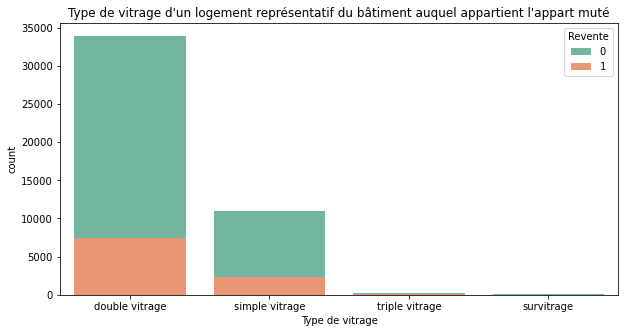

In [168]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_baie_type_vitrage', data=df_selec_2, hue="Revente", palette="Set2", dodge=False)
plt.title("Type de vitrage d'un logement représentatif du bâtiment auquel appartient l'appart muté")
plt.xlabel("Type de vitrage");

In [169]:
g=df_selec_2.groupby("adedpe202006_logtype_baie_type_vitrage").agg({"Revente":"mean"})
g


,Revente
adedpe202006_logtype_baie_type_vitrage,
double vitrage,0.180714
simple vitrage,0.176742
survitrage,0.156863
triple vitrage,0.153025


In [170]:
list_baie=g.index.tolist()
x_ticks=np.arange(len(g))

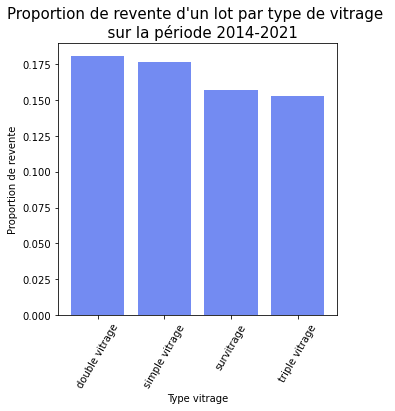

In [171]:
plt.figure(figsize=(5,5))
plt.bar(range(len(g)), g["Revente"], linewidth=5, color="#738bf2")
plt.xticks(x_ticks, list_baie, rotation=60)
plt.xlabel("Type vitrage")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot par type de vitrage \n  sur la période 2014-2021", fontsize=15);

In [172]:
# On supprime la variable pq concerne un logement représentatif du bâtiment

df_selec_2=df_selec_2.drop("adedpe202006_logtype_baie_type_vitrage", axis=1)

In [173]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_ch_gen_lib_princ"=>(dpe) Type de générateur de chauffage principal du bâtiment
df_selec_2["adedpe202006_logtype_ch_gen_lib_princ"].value_counts(ascending=False)



generateurs a effet joule                          25564
chaudiere gaz standard                             15375
chaudiere gaz basse temperature                     1985
reseau de chaleur                                   1653
chaudiere gaz condensation                          1449
chaudiere fioul standard                            1201
chaudiere electrique                                 514
pac air/air                                          482
pac indetermine                                      415
chaudiere energie indetermine standard               281
radiateurs gaz                                       144
chaudiere fioul basse temperature                    137
chaudiere energie indetermine indetermine            121
chauffage autre indetermine                           91
chaudiere energie indetermine basse temperature       41
pac air/eau                                           40
chaudiere fioul condensation                          34
autres                         

In [174]:
df_selec_2["adedpe202006_logtype_ch_gen_lib_princ"].isna().sum()

5619

In [175]:
#remplacement des nan par le mode
df_selec_2["adedpe202006_logtype_ch_gen_lib_princ"]=df_selec_2["adedpe202006_logtype_ch_gen_lib_princ"].fillna(df_selec_2["adedpe202006_logtype_ch_gen_lib_princ"].mode()[0])

In [176]:
def filtre(x) :
    if "gaz" in x :
        return "chaudière gaz"
    elif "joule" in x or "electrique" in x:
        return "chaudière électrique"
    elif "fioul" in x :
        return "chaudière fioul"
    elif "reseau" in x :
        return "réseau de chaleur"
    else :
        return "indeterminé"


In [177]:
df_selec_2["adedpe202006_logtype_ch_gen_lib_princ"]=df_selec_2["adedpe202006_logtype_ch_gen_lib_princ"].apply(filtre)    


In [178]:
df_selec_2["adedpe202006_logtype_ch_gen_lib_princ"].value_counts()

chaudière électrique    31697
chaudière gaz           18953
réseau de chaleur        1653
indeterminé              1520
chaudière fioul          1372
Name: adedpe202006_logtype_ch_gen_lib_princ, dtype: int64

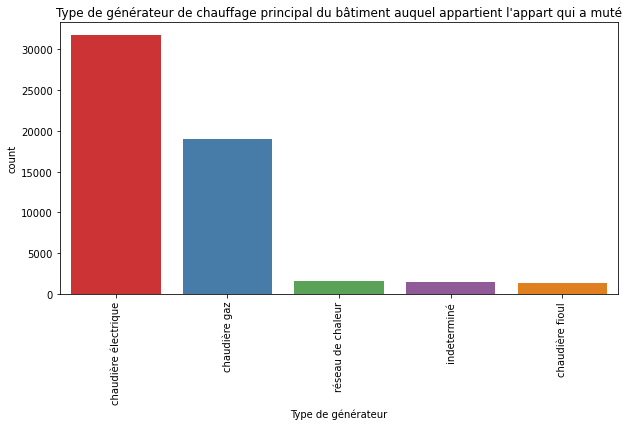

In [179]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_ch_gen_lib_princ', data=df_selec_2, palette="Set1")
plt.title("Type de générateur de chauffage principal du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=90)
plt.xlabel("Type de générateur");

In [180]:
# ANALYSE DE LA VARIABLE  "adedpe202006_mean_class_conso_ener"=>
#(dpe) classe déduite de la moyenne des consommations énergétiques sur l'ensemble des DPE [kWhEP/m².an]
df_selec_2["adedpe202006_mean_class_conso_ener"].value_counts(ascending=False)


E    18055
D    11586
F     9000
N     4765
G     4047
C     2364
B      344
A      100
Name: adedpe202006_mean_class_conso_ener, dtype: int64

In [181]:
df_selec_2["adedpe202006_mean_class_conso_ener"].isna().sum()

4934

In [182]:
# Remplacement des Nan par le mode
df_selec_2["adedpe202006_mean_class_conso_ener"]=df_selec_2["adedpe202006_mean_class_conso_ener"].fillna(df_selec_2["adedpe202006_mean_class_conso_ener"].mode()[0])

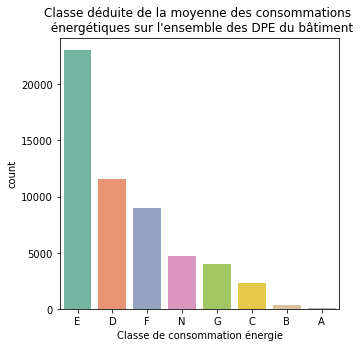

In [183]:
plt.figure(figsize=(5,5))
sns.countplot(x='adedpe202006_mean_class_conso_ener', data=df_selec_2, palette="Set2", order = df_selec_2['adedpe202006_mean_class_conso_ener'].value_counts().index)
plt.title("Classe déduite de la moyenne des consommations \n énergétiques sur l'ensemble des DPE du bâtiment")
plt.xlabel("Classe de consommation énergie");

In [184]:
g=df_selec_2.groupby("adedpe202006_mean_class_conso_ener").agg({"Revente":"mean"})
g

,Revente
adedpe202006_mean_class_conso_ener,
A,0.240000
B,0.139535
C,0.165398
D,0.181771
E,0.184741
F,0.174222
G,0.182851
N,0.165163


In [185]:
list_conso=g.index.tolist()
x_ticks=np.arange(len(g))

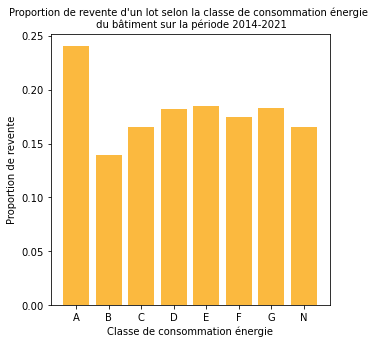

In [186]:
plt.figure(figsize=(5,5))
plt.bar(range(len(g)), g["Revente"], linewidth=5, color="#fbb93f")
plt.xticks(x_ticks, list_conso)
plt.xlabel("Classe de consommation énergie")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot selon la classe de consommation énergie \n du bâtiment sur la période 2014-2021", fontsize=10);

In [187]:
# ANALYSE DE LA VARIABLE  "adedpe202006_mean_class_estim_ges"=>
#(dpe) classe déduite de la moyenne des émissions de GES sur l'ensemble des DPE [kgC02eq/m².an]
#La classe GES figure sur l’étiquette climat d’un logement et permet de connaître la quantité de gaz à effet de serre émise par an.
df_selec_2["adedpe202006_mean_class_estim_ges"].value_counts(ascending=False)


C    12460
D    10752
E    10443
B     5255
N     4777
F     4710
G     1154
A      710
Name: adedpe202006_mean_class_estim_ges, dtype: int64

In [188]:
# Irina : cherche lequel de ces 2 indices est concerné par la réforme

In [189]:
df_selec_2["adedpe202006_mean_class_estim_ges"].isna().sum()

4934

In [190]:
#Remplacement des nans par le mode
df_selec_2["adedpe202006_mean_class_estim_ges"]=df_selec_2["adedpe202006_mean_class_estim_ges"].fillna(df_selec_2["adedpe202006_mean_class_estim_ges"].mode()[0])

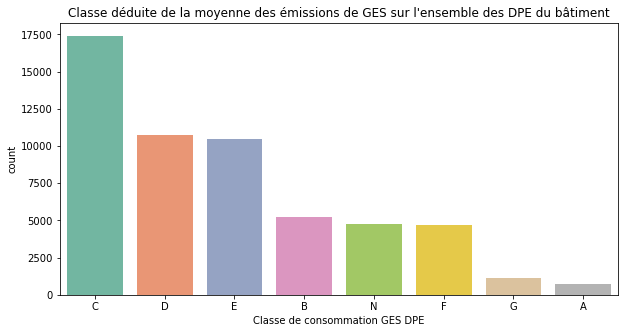

In [191]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_mean_class_estim_ges', data=df_selec_2, palette="Set2", order = df_selec_2['adedpe202006_mean_class_estim_ges'].value_counts().index)
plt.title("Classe déduite de la moyenne des émissions de GES sur l'ensemble des DPE du bâtiment")
plt.xlabel("Classe de consommation GES DPE");

In [192]:
g=df_selec_2.groupby("adedpe202006_mean_class_estim_ges").agg({"Revente":"mean"})
g

,Revente
adedpe202006_mean_class_estim_ges,
A,0.181690
B,0.176974
C,0.181614
D,0.180060
E,0.178589
F,0.194480
G,0.159445
N,0.165794


In [193]:
list_ges=g.index.tolist()
x_ticks=np.arange(len(g))

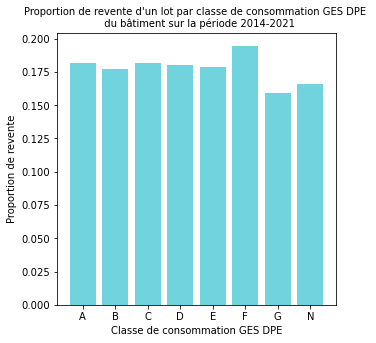

In [194]:
plt.figure(figsize=(5,5))
plt.bar(range(len(g)), g["Revente"], linewidth=5, color="#71d3de")
plt.xticks(x_ticks, list_ges)
plt.xlabel("Classe de consommation GES DPE")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot par classe de consommation GES DPE \n  du bâtiment sur la période 2014-2021", fontsize=10);

In [195]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_traversant"=> (dpe) caractère traversant des logements du bâtiment
df_selec_2["adedpe202006_logtype_traversant"].value_counts(ascending=False)

non traversant                     33590
traversant nord sud (faible)        1442
traversant est ouest (faible)       1315
traversant tout venant (faible)     1090
traversant nord sud                  993
traversant tout venant               866
traversant est ouest                 855
traversant 90° (faible)              480
traversant 90°                       200
Name: adedpe202006_logtype_traversant, dtype: int64

In [196]:
df_selec_2["adedpe202006_logtype_traversant"].isna().sum()

14364

In [197]:
#Remplacement des nans par une classe inconnue
df_selec_2["adedpe202006_logtype_traversant"]=df_selec_2["adedpe202006_logtype_traversant"].fillna("Unknown")

In [198]:
df_selec_2["adedpe202006_logtype_traversant"].value_counts(ascending=False)

non traversant                     33590
Unknown                            14364
traversant nord sud (faible)        1442
traversant est ouest (faible)       1315
traversant tout venant (faible)     1090
traversant nord sud                  993
traversant tout venant               866
traversant est ouest                 855
traversant 90° (faible)              480
traversant 90°                       200
Name: adedpe202006_logtype_traversant, dtype: int64

In [199]:
def filtre(x) :
    if "non" in x:
        return "Non traversant"
    elif x=="Unknown" :
        return "Unknown"
    else :
        return "Traversant"

df_selec_2["adedpe202006_logtype_traversant"]=df_selec_2["adedpe202006_logtype_traversant"].apply(filtre)
df_selec_2["adedpe202006_logtype_traversant"].value_counts(ascending=False)

Non traversant    33590
Unknown           14364
Traversant         7241
Name: adedpe202006_logtype_traversant, dtype: int64

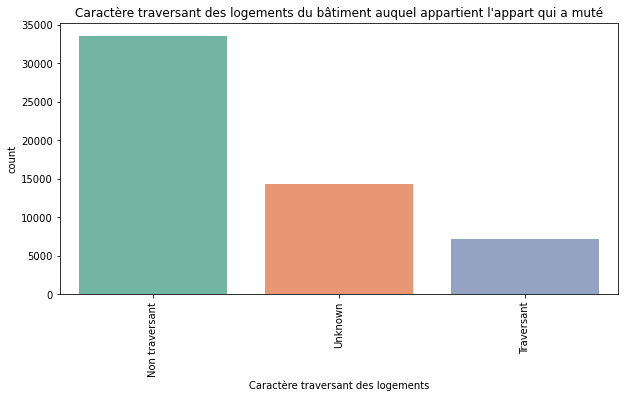

In [200]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_traversant', data=df_selec_2, palette="Set2", order = df_selec_2['adedpe202006_logtype_traversant'].value_counts().index)
plt.title("Caractère traversant des logements du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=90)
plt.xlabel("Caractère traversant des logements");

In [201]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_ecs_type_ener"=> (dpe) Type d'énergie de eau chaude (concaténé + ) du bâtiment
df_selec_2["adedpe202006_logtype_ecs_type_ener"].value_counts(ascending=False)


electricite          29764
gaz                  16726
reseau de chaleur     1274
fioul                  913
autres                 290
Name: adedpe202006_logtype_ecs_type_ener, dtype: int64

In [202]:
df_selec_2["adedpe202006_logtype_ecs_type_ener"].isna().sum()

6228

In [203]:
#Remplacement des nans par le mode
df_selec_2["adedpe202006_logtype_ecs_type_ener"]=df_selec_2["adedpe202006_logtype_ecs_type_ener"].fillna(df_selec_2["adedpe202006_logtype_ecs_type_ener"].mode()[0])

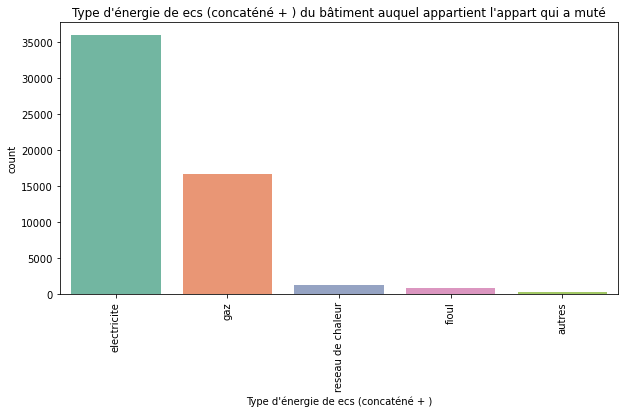

In [204]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_ecs_type_ener', data=df_selec_2, palette="Set2", order = df_selec_2['adedpe202006_logtype_ecs_type_ener'].value_counts().index)
plt.title("Type d'énergie de ecs (concaténé + ) du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=90)
plt.xlabel("Type d'énergie de ecs (concaténé + )");

In [205]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_enr"=> Energies renouvelables présentes dans le bâtiment
df_selec_2["adedpe202006_logtype_enr"].value_counts(ascending=False)


absence                    55189
solaire thermique (ecs)        6
Name: adedpe202006_logtype_enr, dtype: int64

In [206]:
#Suppression de la variable
df_selec_2=df_selec_2.drop("adedpe202006_logtype_enr", axis=1)

In [207]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_perc_surf_vitree_ext"=> (dpe) Pourcentage de surface vitrée d'un logement du bâtiment
df_selec_2["adedpe202006_logtype_perc_surf_vitree_ext"].describe()


count   6737.000000
mean       0.282473
std        0.171129
min        0.000000
25%        0.156000
50%        0.255000
75%        0.364000
max        0.907000
Name: adedpe202006_logtype_perc_surf_vitree_ext, dtype: float64

In [208]:
df_selec_2["adedpe202006_logtype_perc_surf_vitree_ext"].isna().sum()

48458

In [209]:
#Suppression de cette variable compte tenu du nombre de nan
df_selec_2=df_selec_2.drop("adedpe202006_logtype_perc_surf_vitree_ext", axis=1)

In [210]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_ph_pos_isol"=> (dpe) Type d'isolation de la toiture du bâtiment
df_selec_2["adedpe202006_logtype_ph_pos_isol"].value_counts(ascending=False)

non isole    26720
ITI           9046
ITE            279
isole          187
ITE+ITI          2
Name: adedpe202006_logtype_ph_pos_isol, dtype: int64

In [211]:
df_selec_2["adedpe202006_logtype_ph_pos_isol"].isna().sum()

18961

In [212]:
#Remplacement des nans par une classe inconnue
df_selec_2["adedpe202006_logtype_ph_pos_isol"]=df_selec_2["adedpe202006_logtype_ph_pos_isol"].fillna("Unknown")

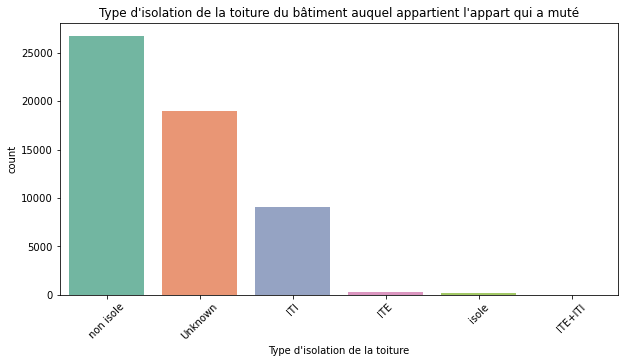

In [213]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_ph_pos_isol', data=df_selec_2, palette="Set2", order = df_selec_2['adedpe202006_logtype_ph_pos_isol'].value_counts().index)
plt.title("Type d'isolation de la toiture du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=45)
plt.xlabel("Type d'isolation de la toiture");

In [214]:
#Variable qui ne nous semble pas pertinente => on l'annule
df_selec_2=df_selec_2.drop("adedpe202006_logtype_ph_pos_isol", axis=1)

In [215]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_presence_balcon"=> (dpe) présence de balcons dans les logements du bâtiment
df_selec_2["adedpe202006_logtype_presence_balcon"].value_counts(ascending=False)

0.000000    7064
1.000000     520
Name: adedpe202006_logtype_presence_balcon, dtype: int64

In [216]:
df_selec_2["adedpe202006_logtype_presence_balcon"].isna().sum()

47611

In [217]:
# Trop de Nan => suppression de la variable
df_selec_2=df_selec_2.drop("adedpe202006_logtype_presence_balcon", axis=1)

In [218]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_presence_climatisation"=> (dpe) Booléen présence de climatisation dans le bâtiment
df_selec_2["adedpe202006_logtype_presence_climatisation"].value_counts(ascending=False)


0.000000    49133
1.000000     1098
Name: adedpe202006_logtype_presence_climatisation, dtype: int64

In [219]:
df_selec_2["adedpe202006_logtype_presence_climatisation"].isna().sum()

4964

In [220]:
#Remplacement des nan par le mode le plus fréquent
df_selec_2["adedpe202006_logtype_presence_climatisation"]=df_selec_2["adedpe202006_logtype_presence_climatisation"].fillna(df_selec_2["adedpe202006_logtype_presence_climatisation"].mode()[0])


In [221]:
#On supprime pq cette variable n'est pas représentative 
#=> il suffit d'une clim dans le bâtiment pour que ce soit un oui

df_selec_2=df_selec_2.drop("adedpe202006_logtype_presence_climatisation", axis=1)

In [222]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_type_batiment"=> Type de construction (batiment)
df_selec_2["adedpe202006_logtype_type_batiment"].value_counts(ascending=False)

Appartement             43872
Non résidentiel          3506
Maison                   1678
Logements collectifs     1073
Centres commerciaux       102
Name: adedpe202006_logtype_type_batiment, dtype: int64

In [223]:
df_selec_2["adedpe202006_logtype_type_batiment"].isna().sum()

4964

In [224]:
#Remplacement des nans par le mode le plus fréquent
df_selec_2["adedpe202006_logtype_type_batiment"]=df_selec_2["adedpe202006_logtype_type_batiment"].fillna(df_selec_2["adedpe202006_logtype_type_batiment"].mode()[0])

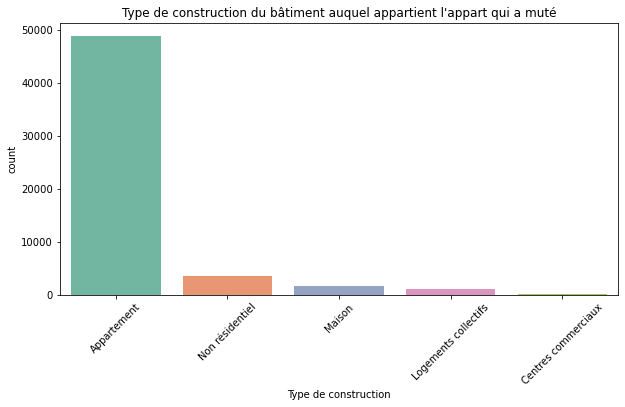

In [225]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_type_batiment', data=df_selec_2, palette="Set2", order = df_selec_2['adedpe202006_logtype_type_batiment'].value_counts().index)
plt.title("Type de construction du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=45)
plt.xlabel("Type de construction");

In [226]:
# On supprime cette variable pq difficile à interpréter

df_selec_2=df_selec_2.drop("adedpe202006_logtype_type_batiment", axis=1)

In [227]:
# ANALYSE DE LA VARIABLE  "ancqpv201410_is_qpv"=> (qpv) Est-ce que le bâtiment est dans un quartier prioritaire de la ville ?
df_selec_2["ancqpv201410_is_qpv"].value_counts(ascending=False)



0.000000    54219
1.000000      856
Name: ancqpv201410_is_qpv, dtype: int64

In [228]:
df_selec_2["ancqpv201410_is_qpv"].isna().sum()

120

In [229]:
#remplacement des nans par l'occurence la plus fréquente
df_selec_2["ancqpv201410_is_qpv"]=df_selec_2["ancqpv201410_is_qpv"].fillna(df_selec_2["ancqpv201410_is_qpv"].mode()[0])


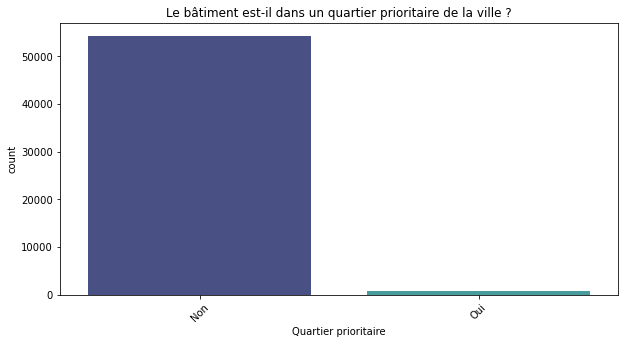

In [230]:
plt.figure(figsize=(10,5))
sns.countplot(x='ancqpv201410_is_qpv', data=df_selec_2, palette="mako", order = df_selec_2['ancqpv201410_is_qpv'].value_counts().index)
plt.title("Le bâtiment est-il dans un quartier prioritaire de la ville ?")
plt.xticks ([0,1], ["Non", "Oui"])
plt.xticks(rotation=45)
plt.xlabel("Quartier prioritaire");



In [231]:
# On supprime pq très déséquilibré

df_selec_2=df_selec_2.drop("ancqpv201410_is_qpv", axis=1)

In [232]:
# ANALYSE DE LA VARIABLE  "arcthd2021t1_l_bat_type"=> (arcep) Type de construction du bâtiment
df_selec_2["arcthd2021t1_l_bat_type"].value_counts(ascending=False)


immeuble    37113
pavillon     4852
Name: arcthd2021t1_l_bat_type, dtype: int64

In [233]:
df_selec_2["arcthd2021t1_l_bat_type"].isna().sum()

13230

In [234]:
#Remplacement des nans par une classe inconnue
df_selec_2["arcthd2021t1_l_bat_type"]=df_selec_2["arcthd2021t1_l_bat_type"].fillna("Unknown")

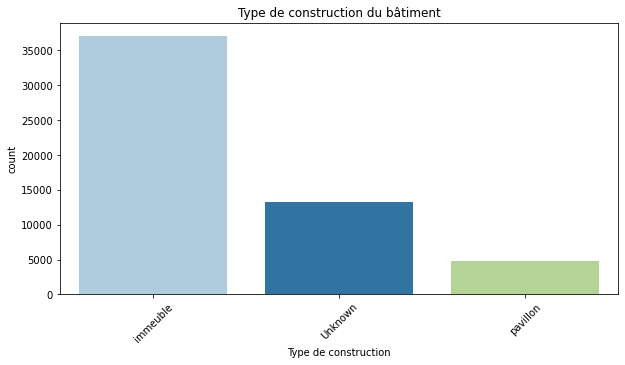

In [235]:
plt.figure(figsize=(10,5))
sns.countplot(x='arcthd2021t1_l_bat_type', data=df_selec_2, palette="Paired", order = df_selec_2['arcthd2021t1_l_bat_type'].value_counts().index)
plt.title("Type de construction du bâtiment")
plt.xticks(rotation=45)
plt.xlabel("Type de construction");

In [236]:
# Pas intéressant pq on ne traite que les bâtiments en copro et bcp de Unknwon

df_selec_2=df_selec_2.drop("arcthd2021t1_l_bat_type", axis=1)

In [237]:
# ANALYSE DE LA VARIABLE  "cerffo2020_annee_construction"=> Année de construction du bâtiment
df_selec_2["cerffo2020_annee_construction"].value_counts(ascending=False)


<1948        40067
1948-1974     3351
1974-2000     2065
>2000         1550
Name: cerffo2020_annee_construction, dtype: int64

In [238]:
df_selec_2["cerffo2020_annee_construction"].isna().sum()

8162

In [239]:
#remplacement des nans par le mode le plus fréquent
df_selec_2["cerffo2020_annee_construction"]=df_selec_2["cerffo2020_annee_construction"].fillna(df_selec_2["cerffo2020_annee_construction"].mode()[0])

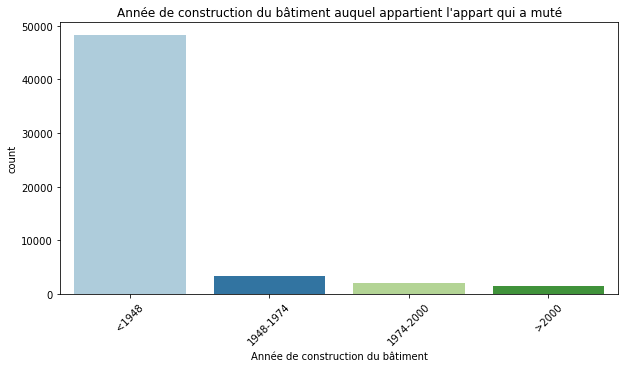

In [240]:
plt.figure(figsize=(10,5))
sns.countplot(x='cerffo2020_annee_construction', data=df_selec_2, palette="Paired", order = df_selec_2['cerffo2020_annee_construction'].value_counts().index)
plt.title("Année de construction du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=45)
plt.xlabel("Année de construction du bâtiment");

In [241]:
g=df_selec_2.groupby("cerffo2020_annee_construction").agg({"Revente":"mean"})
g

,Revente
cerffo2020_annee_construction,
1948-1974,0.190689
1974-2000,0.192736
<1948,0.177818
>2000,0.192258


In [242]:
list_année_cons=g.index.tolist()
x_ticks=np.arange(len(g))

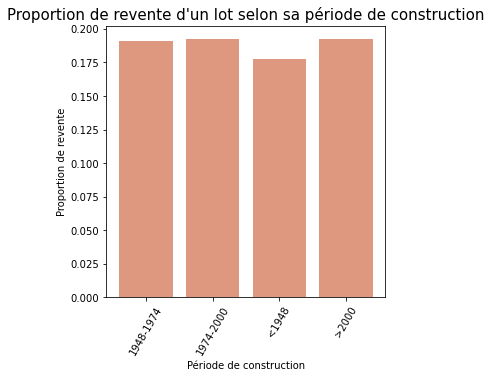

In [243]:
plt.figure(figsize=(5,5))
plt.bar(range(len(g)), g["Revente"], linewidth=5, color="#df9880")
plt.xticks(x_ticks, list_année_cons, rotation=60)
plt.xlabel("Période de construction")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot selon sa période de construction", fontsize=15);



In [244]:
# ANALYSE DE LA VARIABLE  "cerffo2020_usage_niveau_1_txt"=> (cstb) indicateurs d'usage simplifié du bâtiment (verbose)
df_selec_2["cerffo2020_usage_niveau_1_txt"].value_counts(ascending=False)


Résidentiel collectif     51980
Tertiaire & Autres         2524
Résidentiel individuel      625
Dépendance                   40
Secondaire                   26
Name: cerffo2020_usage_niveau_1_txt, dtype: int64

In [245]:
df_selec_2["cerffo2020_usage_niveau_1_txt"].isna().sum()

0

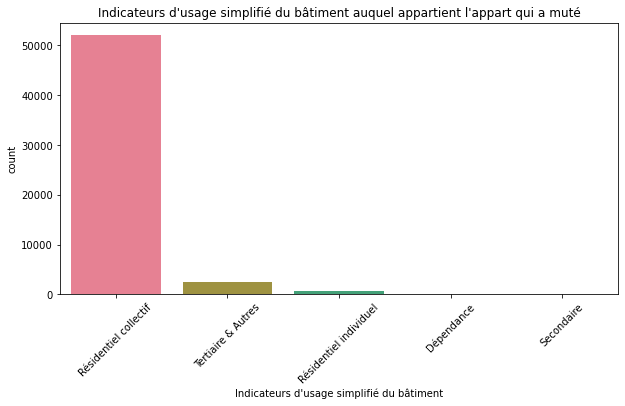

In [246]:
plt.figure(figsize=(10,5))
sns.countplot(x='cerffo2020_usage_niveau_1_txt', data=df_selec_2, palette="husl", order = df_selec_2['cerffo2020_usage_niveau_1_txt'].value_counts().index)
plt.title("Indicateurs d'usage simplifié du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=45)
plt.xlabel("Indicateurs d'usage simplifié du bâtiment");

In [247]:
# ANALYSE DE LA VARIABLE  "cerffo2020_nb_log"=> (ffo) Nombre de logements dans le bâtiment


In [248]:
df_selec_2["cerffo2020_nb_log"].describe()

count   55195.000000
mean       22.119739
std        27.324331
min         0.000000
25%        10.000000
50%        16.000000
75%        24.000000
max       556.000000
Name: cerffo2020_nb_log, dtype: float64

In [249]:
df_selec_2.groupby("cerffo2020_annee_construction").agg({"cerffo2020_nb_log" :'mean'})

,cerffo2020_nb_log
cerffo2020_annee_construction,
1948-1974,44.889884
1974-2000,43.623245
<1948,19.356114
>2000,30.235484


<Figure size 1080x1080 with 0 Axes>

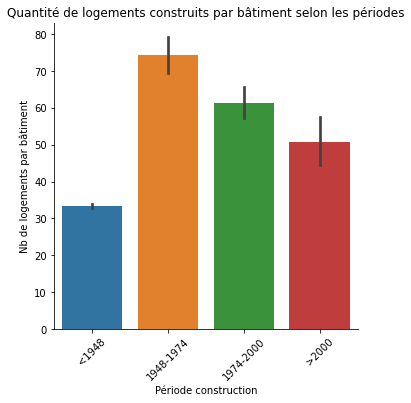

In [250]:
# Nb de logements construits par bâtiment, selon les périodes

plt.figure(figsize=(15,15))
sns.catplot(x = 'cerffo2020_annee_construction', y = 'anarnc202012_nb_log', kind="bar", data = df_selec_2, order=df_selec_2["cerffo2020_annee_construction"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Période construction')
plt.ylabel('Nb de logements par bâtiment')
plt.title('Quantité de logements construits par bâtiment selon les périodes');

In [251]:
# ANALYSE DE LA VARIABLE  "georad2020_alea"=> (radon) Niveau de risque radon
df_selec_2["georad2020_alea"].value_counts(ascending=False)

Faible    55075
Name: georad2020_alea, dtype: int64

In [252]:
df_selec_2["georad2020_alea"].isna().sum()

120

In [253]:
#Pas d'intérêt. Suppression
df_selec_2=df_selec_2.drop("georad2020_alea", axis=1)

In [254]:
# ANALYSE DE LA VARIABLE  "igntop202103_bat_hauteur"=> (ign) Hauteur du bâtiment [m]
df_selec_2["igntop202103_bat_hauteur"].describe()

count   55060.000000
mean       19.031008
std         5.650125
min         0.000000
25%        16.100000
50%        19.400000
75%        22.300000
max        98.200000
Name: igntop202103_bat_hauteur, dtype: float64

In [255]:
df_selec_2["igntop202103_bat_hauteur"].isna().sum()

135

In [256]:
#Remplacement des Nan par la médiane
df_selec_2["igntop202103_bat_hauteur"]=df_selec_2["igntop202103_bat_hauteur"].fillna(df_selec_2["igntop202103_bat_hauteur"].median())

<Figure size 1080x1080 with 0 Axes>

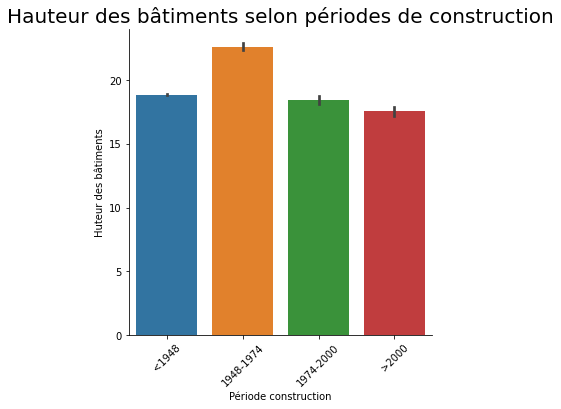

In [257]:
# Hauteur des bâtiments construits selon les périodes

plt.figure(figsize=(15,15))
sns.catplot(x = 'cerffo2020_annee_construction', y = 'igntop202103_bat_hauteur', kind="bar", data = df_selec_2, order=df_selec_2["cerffo2020_annee_construction"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Période construction')
plt.ylabel('Huteur des bâtiments')
plt.title('Hauteur des bâtiments selon périodes de construction', fontsize=20);

In [258]:
df_selec_2["cerffo2020_annee_construction"].value_counts()

<1948        48229
1948-1974     3351
1974-2000     2065
>2000         1550
Name: cerffo2020_annee_construction, dtype: int64

In [259]:
#Création d'une variable "Nbre d'étages"
#La hauteur des étages la plus standard correspond au type de fonction du bâtiment, tour ou édifice :
#2,66 mètres, soit 16 marches pour un immeuble d'habitation récent, hôtel ou parking ;
#3 mètres, soit 18 marches pour un immeuble d'habitation ancien ;

df_selec_2["nbre_etages_ancien"]=round(df_selec_2.loc[df_selec_2["cerffo2020_annee_construction"]=="<1948"]["igntop202103_bat_hauteur"]/3)
df_selec_2["nbre_etages_recent"]=round(df_selec_2.loc[(df_selec_2["cerffo2020_annee_construction"]=="1948-1974")|
                                           (df_selec_2["cerffo2020_annee_construction"]=="1974-2000")|
                                           (df_selec_2["cerffo2020_annee_construction"]==">2000")]["igntop202103_bat_hauteur"]/2.66)



In [260]:
df_selec_2["nbre_etages_ancien"].isna().sum()

6966

In [261]:
df_selec_2["nbre_etages_ancien"]=df_selec_2["nbre_etages_ancien"].fillna(0)


In [262]:
df_selec_2["nbre_etages_recent"].isna().sum()

48229

In [263]:
df_selec_2["nbre_etages_recent"]=df_selec_2["nbre_etages_recent"].fillna(0)


In [264]:
df_selec_2["nbre_etages"]=df_selec_2["nbre_etages_ancien"]+ df_selec_2["nbre_etages_recent"]

In [265]:
df_selec_2["nbre_etages"].isna().sum()

0

In [266]:
df_selec_2["nbre_etages"].value_counts()

7.000000     13666
6.000000     13083
8.000000      8649
5.000000      6577
4.000000      3511
9.000000      3309
3.000000      2306
2.000000      1135
10.000000     1102
11.000000      567
0.000000       331
12.000000      310
1.000000       299
13.000000      139
14.000000       93
15.000000       48
16.000000       14
18.000000       10
17.000000        9
19.000000        8
24.000000        7
20.000000        5
36.000000        4
22.000000        4
29.000000        4
28.000000        4
37.000000        1
Name: nbre_etages, dtype: int64

In [267]:
# On regroupe 

def filtre (x) :
    if x >=0 and x <4 :
        return "De 0 à 3"
    elif x>=4 and x <8 :
        return "De 4 à 7"
    elif x>=8 and x<=10 :
        return "De 8 à 10"
    else :
        return " >10"
    
df_selec_2["nbre_etages"]=df_selec_2["nbre_etages"].apply(filtre)
df_selec_2["nbre_etages"].value_counts()

De 4 à 7     36837
De 8 à 10    13060
De 0 à 3      4071
 >10          1227
Name: nbre_etages, dtype: int64

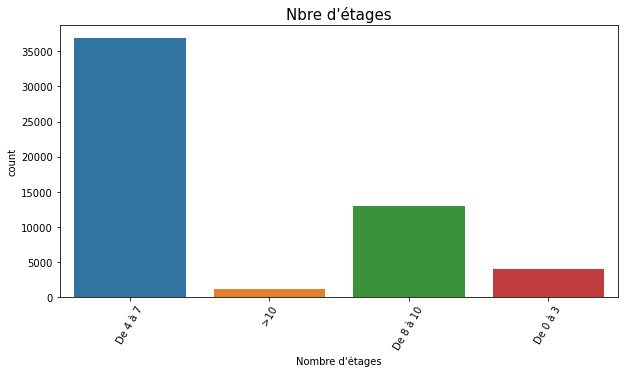

In [268]:
plt.figure(figsize=(10,5))
sns.countplot(x='nbre_etages', data=df_selec_2)
plt.title("Nbre d'étages", fontsize=15)
plt.xticks(rotation=60)
plt.xlabel("Nombre d'étages");

In [269]:
# suppression des variables "nbre_etages_ancien" et nbre_etages_recent

df_selec_2=df_selec_2.drop(["nbre_etages_ancien", "nbre_etages_recent"], axis=1)

In [270]:
# ANALYSE DE LA VARIABLE  "mcumer202007_is_mer"=> 
#(merimee) Le bâtiment est situé dans un périmètre ABF monument historique ? (<= 500 m)
df_selec_2["mcumer202007_is_mer"].value_counts(ascending=False)


1.000000    52685
0.000000     2390
Name: mcumer202007_is_mer, dtype: int64

In [271]:
df_selec_2["mcumer202007_is_mer"].isna().sum()

120

In [272]:
#remplacement des Nan par la médiane
df_selec_2["mcumer202007_is_mer"]=df_selec_2["mcumer202007_is_mer"].fillna(df_selec_2["mcumer202007_is_mer"].median())

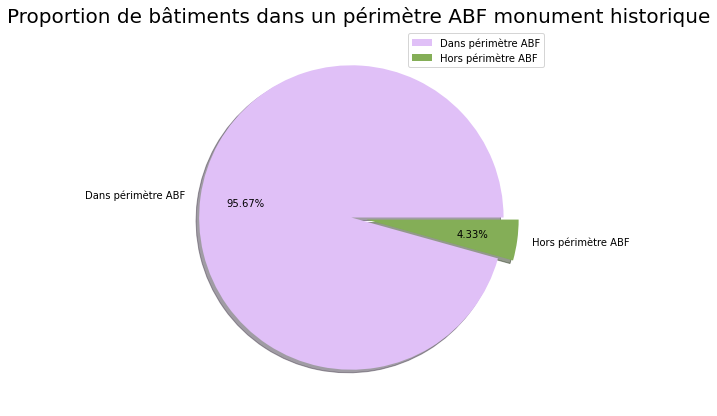

In [273]:
plt.figure(figsize=(7,7))
x=df_selec_2["mcumer202007_is_mer"].value_counts()

plt.pie(x, labels=["Dans périmètre ABF", "Hors périmètre ABF"], 
        colors=["#e0c0f7", "#84ae57"], 
        explode=[0.05,0.05],
        autopct=lambda x : str(round(x,2))+ "%", 
        pctdistance=0.7, 
        shadow=True)
plt.title("Proportion de bâtiments dans un périmètre ABF monument historique", fontsize=20)
plt.legend(loc="best");

In [274]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_s_hab"=> (dpe) Surface habitable du DPE
df_selec_2["adedpe202006_logtype_s_hab"].describe()

count   50070.000000
mean       89.783064
std       369.858597
min         0.000000
25%        28.000000
50%        44.000000
75%        73.000000
max     16008.000000
Name: adedpe202006_logtype_s_hab, dtype: float64

In [275]:
df_selec_2["adedpe202006_logtype_s_hab"].isna().sum()

5125

In [276]:
#On a déjà 2 variables d'indication de surface. suppression de celle-ci
df_selec_2=df_selec_2.drop("adedpe202006_logtype_s_hab", axis=1)


In [277]:
# ANALYSE DE LA VARIABLE  "insbpe2019_l_type_equipement_supermarché"=> Présence d'un commerce de type supermarché, épicerie dans le bâtiment
df_selec_2["insbpe2019_l_type_equipement_supermarché"].value_counts(ascending=False)



0    54082
1     1113
Name: insbpe2019_l_type_equipement_supermarché, dtype: int64

In [278]:
# ANALYSE DE LA VARIABLE  "insbpe2019_l_type_equipement_restaurant"=> Présence d'un commerce de type restaurat dans le bâtiment
df_selec_2["insbpe2019_l_type_equipement_restaurant"].value_counts(ascending=False)

0    49758
1     5437
Name: insbpe2019_l_type_equipement_restaurant, dtype: int64

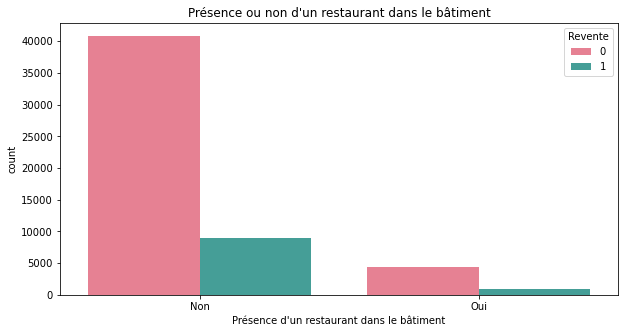

In [279]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'insbpe2019_l_type_equipement_restaurant', hue = "Revente", data = df_selec_2, palette="husl");
plt.title("Présence ou non d'un restaurant dans le bâtiment")
plt.xticks ([0,1], ["Non", "Oui"])
plt.xlabel("Présence d'un restaurant dans le bâtiment");

In [280]:
# ANALYSE DE LA VARIABLE  "insbpe2019_l_type_equipement_boulangerie"=> Présence d'un commerce de type boulangerie dans le bâtiment
df_selec_2["insbpe2019_l_type_equipement_boulangerie"].value_counts(ascending=False)

0    54558
1      637
Name: insbpe2019_l_type_equipement_boulangerie, dtype: int64

In [281]:
# ANALYSE DE LA VARIABLE  "insbpe2019_l_type_equipement_autre"=> Présence d'un commerce autre que supermarché, restaurant ou boulangerie dans le bâtiment
df_selec_2["insbpe2019_l_type_equipement_autre"].value_counts(ascending=False)




1    31434
0    23761
Name: insbpe2019_l_type_equipement_autre, dtype: int64

In [282]:
# Regroupement des équipements resto + supermarché + boulangerie

df_selec_2["insbpe2019_l_type_equipement_bruyant"]=df_selec_2["insbpe2019_l_type_equipement_supermarché"]+df_selec_2["insbpe2019_l_type_equipement_boulangerie"]+df_selec_2["insbpe2019_l_type_equipement_restaurant"]

In [283]:
df_selec_2["insbpe2019_l_type_equipement_bruyant"].unique()

array([0, 1], dtype=int64)

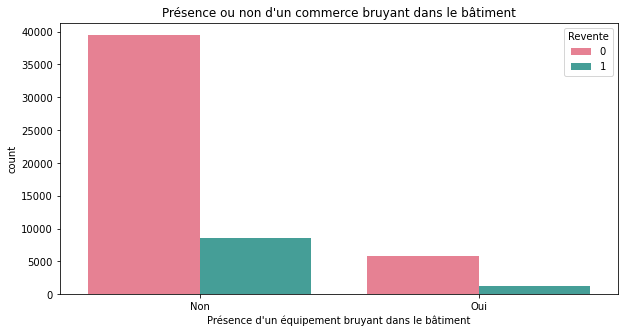

In [284]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'insbpe2019_l_type_equipement_bruyant', hue = "Revente", data = df_selec_2, palette="husl");
plt.title("Présence ou non d'un commerce bruyant dans le bâtiment")
plt.xticks ([0,1], ["Non", "Oui"])
plt.xlabel("Présence d'un équipement bruyant dans le bâtiment");

In [285]:
g=df_selec_2.groupby("insbpe2019_l_type_equipement_bruyant").agg({"Revente":"mean"})
g

,Revente
insbpe2019_l_type_equipement_bruyant,
0,0.179074
1,0.182830


In [286]:
list_equip=g.index.tolist()
x_ticks=np.arange(len(g))

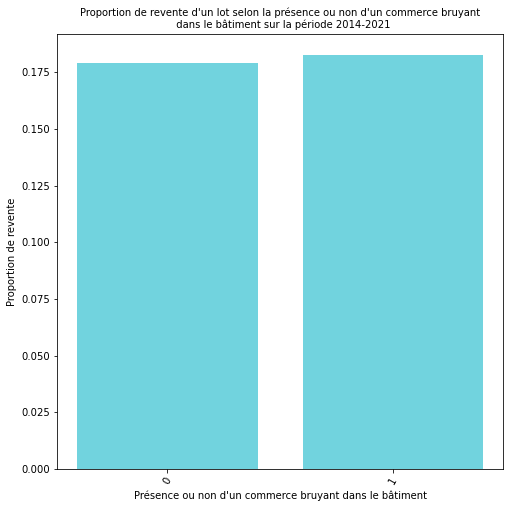

In [287]:
plt.figure(figsize=(8,8))
plt.bar(range(len(g)), g["Revente"], linewidth=5, color="#71d3de")
plt.xticks(x_ticks, list_equip, rotation=60)
plt.xlabel("Présence ou non d'un commerce bruyant dans le bâtiment")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot selon la présence ou non d'un commerce bruyant\n  dans le bâtiment sur la période 2014-2021", fontsize=10);

In [288]:
df_selec_2["qty_of_mut"].unique()

array([0, 1, 2, 3], dtype=int64)

In [289]:
df_selec_2["qty_of_mut"].value_counts()

0    45284
1     9347
2      540
3       24
Name: qty_of_mut, dtype: int64

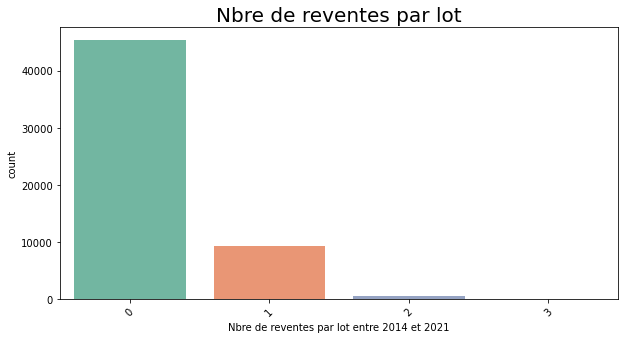

In [290]:
plt.figure(figsize=(10,5))

sns.countplot(x='qty_of_mut', data=df_selec_2, palette="Set2")
plt.title("Nbre de reventes par lot", fontsize=20)
plt.xlabel("Nbre de reventes par lot entre 2014 et 2021")

plt.xticks(rotation=45);

In [291]:
df_selec_2["anneemut"].value_counts()
#Trier par ordre année

2017    7880
2019    7474
2018    7343
2015    7179
2016    6861
2021    6682
2020    6012
2014    5764
Name: anneemut, dtype: int64

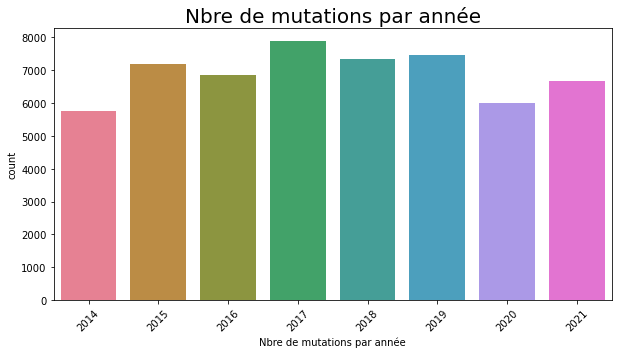

In [292]:
plt.figure(figsize=(10,5))

sns.countplot(x='anneemut', data=df_selec_2, palette="husl")
plt.title("Nbre de mutations par année", fontsize=20)
plt.xlabel("Nbre de mutations par année")

plt.xticks(rotation=45);

<Figure size 720x720 with 0 Axes>

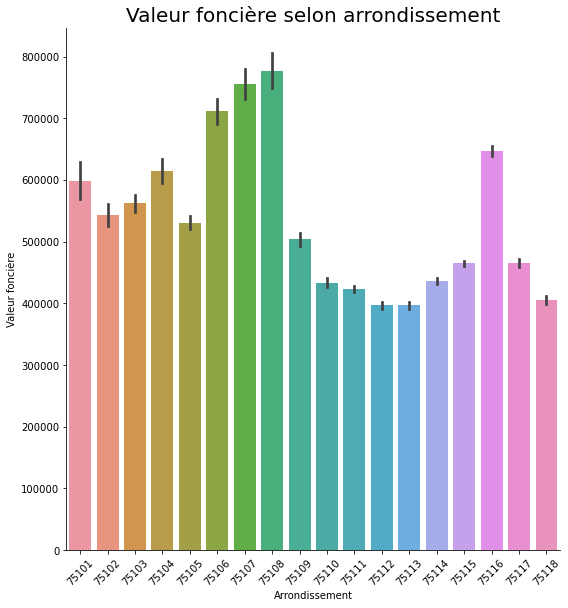

In [293]:
#Valeur en fonction de l'arrondissement
plt.figure(figsize=(10,10))
sns.catplot(x = 'l_codinsee', y = 'valeurfonc', kind="bar", height=8, data = df_selec_2)
plt.xticks(rotation=45)
plt.xlabel('Arrondissement')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière selon arrondissement', fontsize=20);
       

<Figure size 576x576 with 0 Axes>

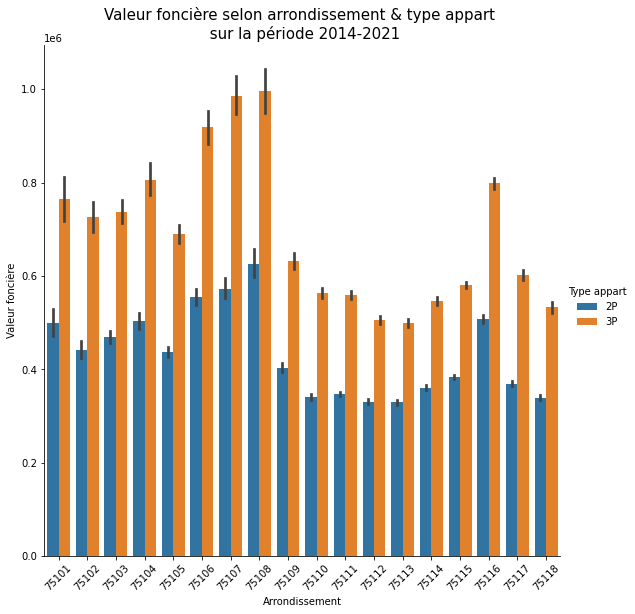

In [294]:
#Valeur en fonction de l'arrondissement
plt.figure(figsize=(8,8))
sns.catplot(x = 'l_codinsee', y = 'valeurfonc', kind="bar", hue = "Type appart", height=8, data = df_selec_2)
plt.xticks(rotation=45)
plt.xlabel('Arrondissement')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière selon arrondissement & type appart \n sur la période 2014-2021', fontsize=15);
            


<Figure size 360x360 with 0 Axes>

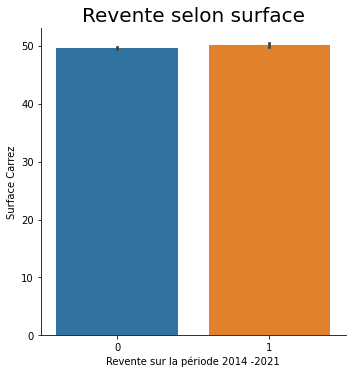

In [295]:
# Revente selon surface Carrez
plt.figure(figsize=(5,5))
sns.catplot(x = 'Revente', y = 'scarrez', kind="bar", data = df_selec_2)
plt.xlabel('Revente sur la période 2014 -2021')
plt.ylabel('Surface Carrez')
plt.title('Revente selon surface', fontsize=20);

In [296]:
# Faire des catégories de surface et regrader la proportion de vendu ou pas pour chaque catégorie

df_selec_2["scarrez"].describe()

count   55195.000000
mean       49.788831
std        20.125664
min         0.500000
25%        35.270000
50%        46.820000
75%        60.800000
max       215.000000
Name: scarrez, dtype: float64

In [297]:
df_selec_2["cat_scarrez"]=pd.cut(df_selec_2["scarrez"], 
bins=[0, 35, 47, 60,215], 
labels=["<35 m²", "Entre 35 & 47 m²", "Entre 47 & 60m²", ">60m²"])

In [298]:
g=df_selec_2.groupby("cat_scarrez").agg({"Revente":"mean"})
g

,Revente
cat_scarrez,
<35 m²,0.161519
Entre 35 & 47 m²,0.175969
Entre 47 & 60m²,0.200340
>60m²,0.181220


In [299]:
list_scarrez=g.index.tolist()
x_ticks=np.arange(len(g))

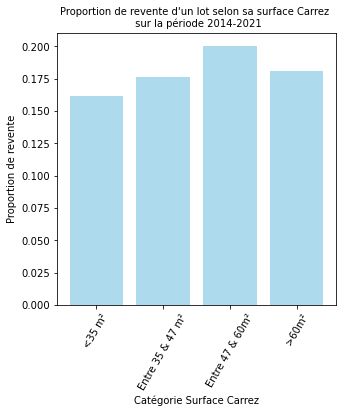

In [300]:
plt.figure(figsize=(5,5))
plt.bar(range(len(g)), g["Revente"], linewidth=5, color="#aedaed")
plt.xticks(x_ticks, list_scarrez, rotation=60)
plt.xlabel("Catégorie Surface Carrez")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot selon sa surface Carrez \n sur la période 2014-2021", fontsize=10);

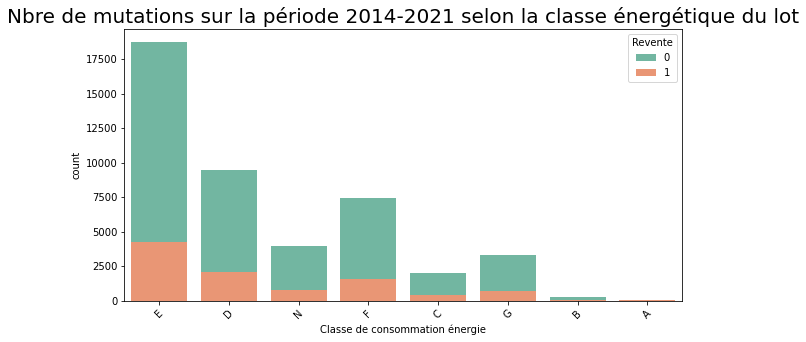

In [301]:
plt.figure(figsize=(10,5))

sns.countplot(x='adedpe202006_mean_class_conso_ener', hue="Revente", data=df_selec_2, palette="Set2", dodge=False)
plt.title("Nbre de mutations sur la période 2014-2021 selon la classe énergétique du lot", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Classe de consommation énergie');

<Figure size 1080x1080 with 0 Axes>

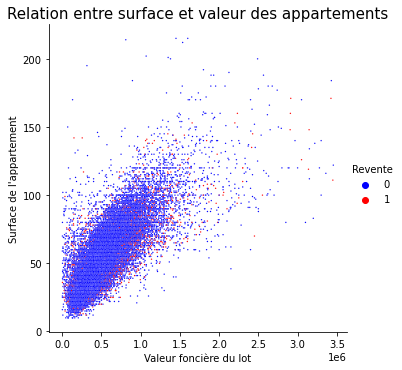

In [302]:
#Relation entre valeur foncière et surface
plt.figure(figsize=(15,15))
sns.relplot(x="valeurfonc", y="surface_appart", hue="Revente", data=df_selec_2, s=2, palette=["b", "r"]);
plt.xlabel("Valeur foncière du lot")
plt.ylabel("Surface de l'appartement")
plt.title("Relation entre surface et valeur des appartements", fontsize=15);

In [303]:
# trouver comment faire pour que quand bcp de points au même endroit ca fasse un gros point (weight-density ???)

<Figure size 360x360 with 0 Axes>

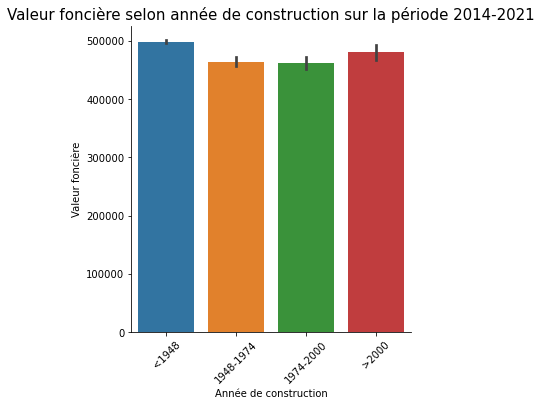

In [304]:
# Valeur foncière selon année de construction 

plt.figure(figsize=(5,5))
sns.catplot(x = 'cerffo2020_annee_construction', y = 'valeurfonc', kind="bar", data = df_selec_2)
plt.xticks(rotation=45)
plt.xlabel('Année de construction')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière selon année de construction sur la période 2014-2021', fontsize=15);

<Figure size 576x576 with 0 Axes>

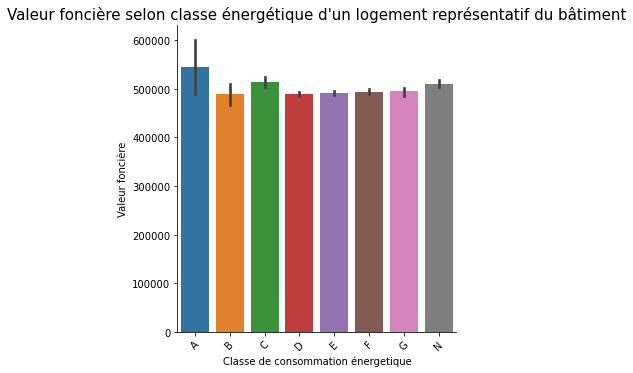

In [305]:
#Valeur foncière selon classe énergétique

plt.figure(figsize=(8,8))
sns.catplot(x = 'adedpe202006_mean_class_conso_ener', 
            y = 'valeurfonc', 
            kind="bar", 
            data = df_selec_2, 
            order=df_selec_2["adedpe202006_mean_class_conso_ener"].value_counts().index.sort_values())
plt.xticks(rotation=45)
plt.xlabel('Classe de consommation énergetique')
plt.ylabel('Valeur foncière')
plt.title("Valeur foncière selon classe énergétique d'un logement représentatif du bâtiment", fontsize=15);

<Figure size 576x576 with 0 Axes>

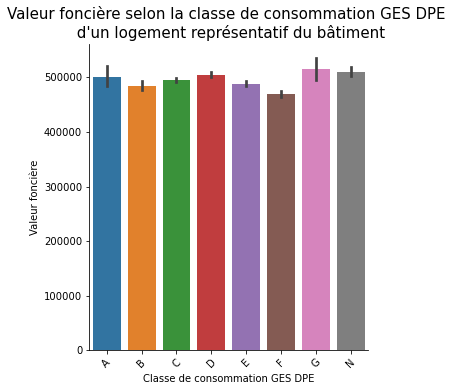

In [306]:
#Valeur foncière selon la Classe de consommation GES DPE d'un logement représentatif du bâtiment
plt.figure(figsize=(8,8))
sns.catplot(x = 'adedpe202006_mean_class_estim_ges', 
            y = 'valeurfonc', 
            kind="bar", 
            data = df_selec_2, 
            order=df_selec_2["adedpe202006_mean_class_estim_ges"].value_counts().index.sort_values())
plt.xticks(rotation=45)
plt.xlabel('Classe de consommation GES DPE')
plt.ylabel('Valeur foncière')
plt.title("Valeur foncière selon la classe de consommation GES DPE \n d'un logement représentatif du bâtiment", fontsize=15);


<Figure size 1080x1080 with 0 Axes>

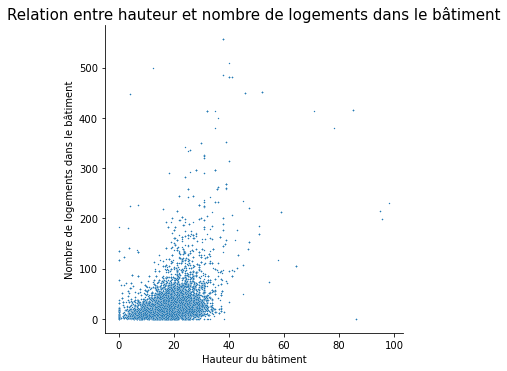

In [307]:
#Relation entre hauteur et nombre de logements dans le bâtiment

plt.figure(figsize=(15,15))
sns.relplot(x="igntop202103_bat_hauteur", y="cerffo2020_nb_log", data=df_selec_2, s=2, palette=["b", "r"]);
plt.xlabel("Hauteur du bâtiment")
plt.ylabel("Nombre de logements dans le bâtiment")
plt.title("Relation entre hauteur et nombre de logements dans le bâtiment", fontsize=15);

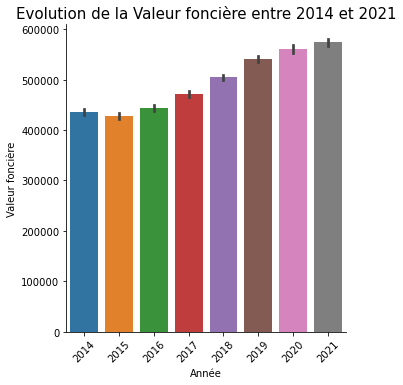

In [308]:
# Valeur foncière moyen par année de transaction
sns.catplot(x = 'anneemut', 
            y = 'valeurfonc', 
            kind="bar", 
            data = df_selec_2)
            
plt.xticks(rotation=45)
plt.xlabel('Année')
plt.ylabel('Valeur foncière')
plt.title("Evolution de la Valeur foncière entre 2014 et 2021", fontsize=15);


In [309]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_ch_type_inst"=> (dpe) Type d'installation de chauffage

In [310]:
df_selec_2["adedpe202006_logtype_ch_type_inst"].isna().sum()

13183

In [311]:
df_selec_2["adedpe202006_logtype_ch_type_inst"]=df_selec_2["adedpe202006_logtype_ch_type_inst"].fillna("Unknown")

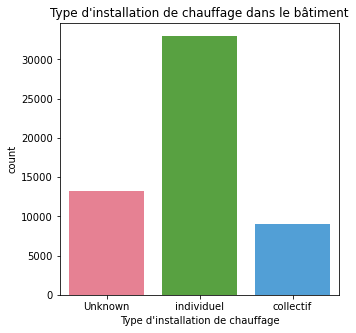

In [312]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'adedpe202006_logtype_ch_type_inst', data = df_selec_2, palette="husl");
plt.title("Type d'installation de chauffage dans le bâtiment")
plt.xlabel("Type d'installation de chauffage");

In [313]:
g=df_selec_2.groupby("adedpe202006_logtype_ch_type_inst").agg({"Revente":"mean"})
g

,Revente
adedpe202006_logtype_ch_type_inst,
Unknown,0.182204
collectif,0.179993
individuel,0.178391


In [314]:
list_chauffage=g.index.tolist()
x_ticks=np.arange(len(g))

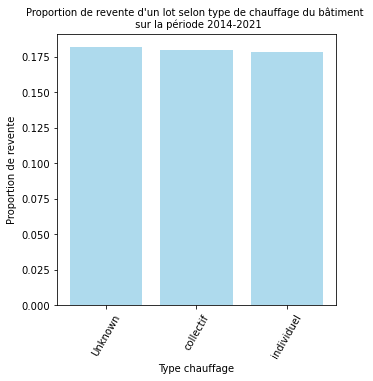

In [315]:
plt.figure(figsize=(5,5))
plt.bar(range(len(g)), g["Revente"], linewidth=5, color="#aedaed")
plt.xticks(x_ticks, list_chauffage, rotation=60)
plt.xlabel("Type chauffage")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot selon type de chauffage du bâtiment \n sur la période 2014-2021", fontsize=10);

In [316]:
# groupby pour voir dans le détail le type d'installation

df_selec_2.groupby(["adedpe202006_logtype_ch_type_inst", "adedpe202006_logtype_ch_gen_lib_princ"]).agg({"adedpe202006_logtype_ch_gen_lib_princ":"count"})

adedpe202006_logtype_ch_gen_lib_princ
adedpe202006_logtype_ch_type_inst adedpe202006_logtype_ch_gen_lib_princ                                       
Unknown                           chaudière fioul                                                          128
                                  chaudière gaz                                                           2265
                                  chaudière électrique                                                   10032
                                  indeterminé                                                              525
                                  réseau de chaleur                                                        233
collectif                         chaudière fioul                                                         1050
                                  chaudière gaz                                                           6326
                                  chaudière électrique                                                     332
                                  indeterminé                                                              116
                                  réseau de chaleur                                                       1193
individuel                        chaudière fioul                                                          194
                                  chaudière gaz                                                          10362
                                  chaudière électrique                                                   21333
                                  indeterminé                                                              879
                                  réseau de chaleur                                                        227

C:\Users\Anne\AppData\Local\Temp/ipykernel_4312/3718029404.py:24: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


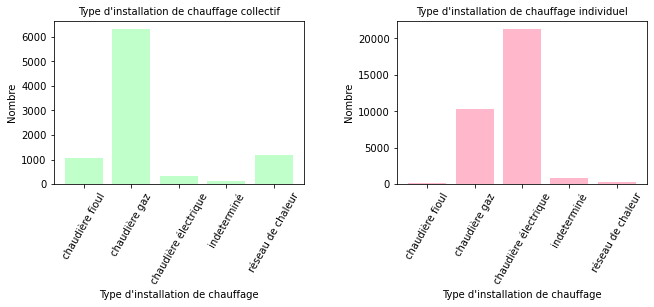

In [317]:
j=df_selec_2.groupby(["adedpe202006_logtype_ch_type_inst", "adedpe202006_logtype_ch_gen_lib_princ"]).agg({"adedpe202006_logtype_ch_gen_lib_princ":"count"})
plt.figure(figsize=(10,8))

plt.subplot(221)
list_index_col=j.iloc[5:10,:].index.tolist()
list_index_col=["chaudière fioul", "chaudière gaz", "chaudière électrique", "indeterminé", "réseau de chaleur"]
x_ticks=np.arange(len(j.iloc[5:10,:]))
plt.bar(range(len(j.iloc[5:10,:])), j.iloc[5:10,:]["adedpe202006_logtype_ch_gen_lib_princ"], linewidth=5, color="#c0ffc9")
plt.xticks(x_ticks, list_index_col, rotation=60)
plt.xlabel("Type d'installation de chauffage")
plt.ylabel("Nombre")
plt.title("Type d'installation de chauffage collectif", fontsize=10)

plt.subplot(222)
list_index_ind=j.iloc[10:,:].index.tolist()
list_index_ind=["chaudière fioul", "chaudière gaz", "chaudière électrique", "indeterminé", "réseau de chaleur"]
x_ticks=np.arange(len(j.iloc[10:,:]))
plt.bar(range(len(j.iloc[10:,:])), j.iloc[10:,:]["adedpe202006_logtype_ch_gen_lib_princ"], linewidth=5, color="#ffb7cb")
plt.xticks(x_ticks, list_index_ind, rotation=60)
plt.xlabel("Type d'installation de chauffage")
plt.ylabel("Nombre")
plt.title("Type d'installation de chauffage individuel", fontsize=10)

plt.tight_layout(4)
plt.show()

In [318]:
# Nous décidons de ne pas prendre cette variable "adedpe202006_logtype_ch_gen_lib_princ" das la modélisation pq
# ce qui nous semble sutout déterminant c'est le fait que le chauffage soit collectif ou individuel

df_selec_2=df_selec_2.drop("adedpe202006_logtype_ch_gen_lib_princ", axis=1)

In [319]:
# Analyse de la variable "adedpe202006_logtype_ecs_type_inst"=> (dpe) Type d'installation d'ECS (individuelle ou collective)

df_selec_2["adedpe202006_logtype_ecs_type_inst"].value_counts()

individuel    35994
collectif      6842
Name: adedpe202006_logtype_ecs_type_inst, dtype: int64

In [320]:
df_selec_2["adedpe202006_logtype_ecs_type_inst"].isna().sum()
# Contrôle absence d'anomlies, fait en NB 1

12359

In [321]:
# on remplace les Nan par Unknown
df_selec_2["adedpe202006_logtype_ecs_type_inst"]=df_selec_2["adedpe202006_logtype_ecs_type_inst"].fillna("Unknown")

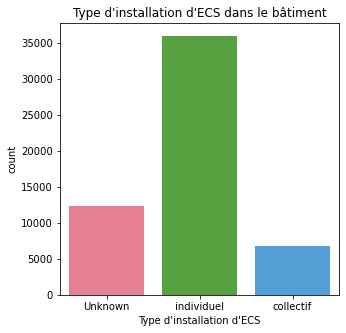

In [322]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'adedpe202006_logtype_ecs_type_inst', data = df_selec_2, palette="husl");
plt.title("Type d'installation d'ECS dans le bâtiment")
plt.xlabel("Type d'installation d'ECS");

In [323]:
g=df_selec_2.groupby("adedpe202006_logtype_ecs_type_inst").agg({"Revente":"mean"})
g

,Revente
adedpe202006_logtype_ecs_type_inst,
Unknown,0.179869
collectif,0.176703
individuel,0.180002


In [324]:
list_ecs=g.index.tolist()
x_ticks=np.arange(len(g))

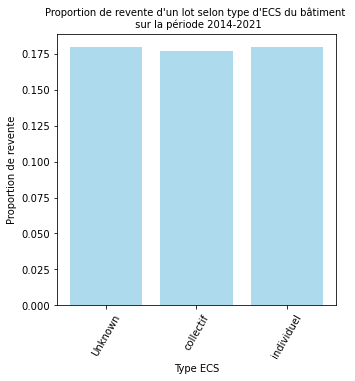

In [325]:
plt.figure(figsize=(5,5))
plt.bar(range(len(g)), g["Revente"], linewidth=5, color="#aedaed")
plt.xticks(x_ticks, list_ecs, rotation=60)
plt.xlabel("Type ECS")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot selon type d'ECS du bâtiment \n sur la période 2014-2021", fontsize=10);

In [326]:
# groupby pour voir dans le détail le type d'installation

df_selec_2.groupby(["adedpe202006_logtype_ecs_type_inst", "adedpe202006_logtype_ecs_type_ener"]).agg({"adedpe202006_logtype_ecs_type_ener":"count"})

adedpe202006_logtype_ecs_type_ener
adedpe202006_logtype_ecs_type_inst adedpe202006_logtype_ecs_type_ener                                    
Unknown                            autres                                                              20
                                   electricite                                                       9763
                                   fioul                                                               79
                                   gaz                                                               2356
                                   reseau de chaleur                                                  141
collectif                          autres                                                              39
                                   electricite                                                        734
                                   fioul                                                              690
                                   gaz                                                               4286
                                   reseau de chaleur                                                 1093
individuel                         autres                                                             231
                                   electricite                                                      25495
                                   fioul                                                              144
                                   gaz                                                              10084
                                   reseau de chaleur                                                   40

In [327]:
g=df_selec_2.groupby(["adedpe202006_logtype_ecs_type_inst", "adedpe202006_logtype_ecs_type_ener"]).agg({"adedpe202006_logtype_ecs_type_ener":"count"})

C:\Users\Anne\AppData\Local\Temp/ipykernel_4312/2063400230.py:23: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


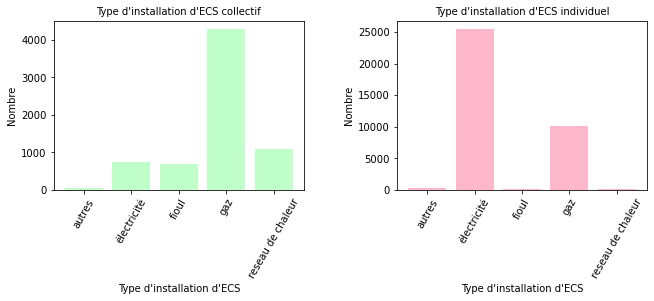

In [328]:
plt.figure(figsize=(10,8))

plt.subplot(221)
list_index_col=g.iloc[5:10,:].index.tolist()
list_index_col=["autres", "électricité", "fioul", "gaz", "reseau de chaleur"]
x_ticks=np.arange(len(g.iloc[5:10,:]))
plt.bar(range(len(g.iloc[5:10,:])), g.iloc[5:10,:]["adedpe202006_logtype_ecs_type_ener"], linewidth=5, color="#c0ffc9")
plt.xticks(x_ticks, list_index_col, rotation=60)
plt.xlabel("Type d'installation d'ECS")
plt.ylabel("Nombre")
plt.title("Type d'installation d'ECS collectif", fontsize=10)

plt.subplot(222)
list_index_ind=g.iloc[10:,:].index.tolist()
list_index_ind=["autres", "électricité", "fioul", "gaz", "reseau de chaleur"]
x_ticks=np.arange(len(g.iloc[10:,:]))
plt.bar(range(len(g.iloc[10:,:])), g.iloc[10:,:]["adedpe202006_logtype_ecs_type_ener"], linewidth=5, color="#ffb7cb")
plt.xticks(x_ticks, list_index_ind, rotation=60)
plt.xlabel("Type d'installation d'ECS")
plt.ylabel("Nombre")
plt.title("Type d'installation d'ECS individuel", fontsize=10)

plt.tight_layout(4)
plt.show()

In [329]:
# Comme pour le chauffage, ce qui va nous interesser pour la mdoélisation, c'est de savoir si le chauffage de l'eau est collectif ou individuel
# on supprime le type d'installation d'ECS

df_selec_2=df_selec_2.drop("adedpe202006_logtype_ecs_type_ener", axis=1)

In [330]:
#Analyse de la variable "adedpe202006_logtype_mur_ep_mat_ext" =>Epaisseur de la structure des murs la plus fréquente en surface

df_selec_2["adedpe202006_logtype_mur_ep_mat_ext"].value_counts()

20 et -       2872
Sans objet    1069
30             646
25             589
50             361
22.5           295
23             278
28             257
40             216
35             213
45             125
34             112
32              57
9 et -          45
19              31
20              29
8 et -          29
33              27
55              24
15 et -         21
5               18
40 et -         13
24              10
43               9
60               9
12               7
13               7
38               6
15               5
18               5
65               4
Name: adedpe202006_logtype_mur_ep_mat_ext, dtype: int64

In [331]:
df_selec_2["adedpe202006_logtype_mur_ep_mat_ext"].isna().sum()

47806

In [332]:
# 86% Nan. On supprime
df_selec_2=df_selec_2.drop("adedpe202006_logtype_mur_ep_mat_ext", axis=1)

In [333]:
#Analyse de la variable "adedpe202006_logtype_mur_mat_ext" =>(dpe) Matériaux de la structure des murs extérieurs

df_selec_2["adedpe202006_logtype_mur_mat_ext"].value_counts()

Mur en pierre               25148
Indeterminé                 10931
Mur en béton                10206
Mur en brique                7199
Mur en pan de bois           1510
Mur en cloison de plâtre      201
Name: adedpe202006_logtype_mur_mat_ext, dtype: int64

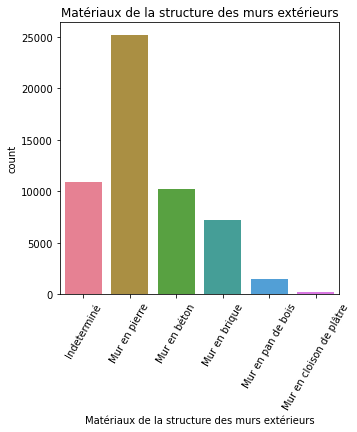

In [334]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'adedpe202006_logtype_mur_mat_ext', data = df_selec_2, palette="husl");
plt.title("Matériaux de la structure des murs extérieurs")
plt.xlabel("Matériaux de la structure des murs extérieurs")
plt.xticks(rotation=60);

In [335]:
# Croisement de cette variable avec période de construction

j=df_selec_2.groupby(["cerffo2020_annee_construction", "adedpe202006_logtype_mur_mat_ext"]).agg({"adedpe202006_logtype_mur_mat_ext":"count"})
j

adedpe202006_logtype_mur_mat_ext
cerffo2020_annee_construction adedpe202006_logtype_mur_mat_ext                                  
1948-1974                     Indeterminé                                                    470
                              Mur en brique                                                  241
                              Mur en béton                                                  2117
                              Mur en pan de bois                                              27
                              Mur en pierre                                                  496
1974-2000                     Indeterminé                                                    383
                              Mur en brique                                                  118
                              Mur en béton                                                  1124
                              Mur en pan de bois                                              75
                              Mur en pierre                                                  365
<1948                         Indeterminé                                                   9690
                              Mur en brique                                                 6716
                              Mur en béton                                                  6392
                              Mur en cloison de plâtre                                       199
                              Mur en pan de bois                                            1380
                              Mur en pierre                                                23852
>2000                         Indeterminé                                                    388
                              Mur en brique                                                  124
                              Mur en béton                                                   573
                              Mur en cloison de plâtre                                         2
                              Mur en pan de bois                                              28
                              Mur en pierre                                                  435

C:\Users\Anne\AppData\Local\Temp/ipykernel_4312/178095979.py:42: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


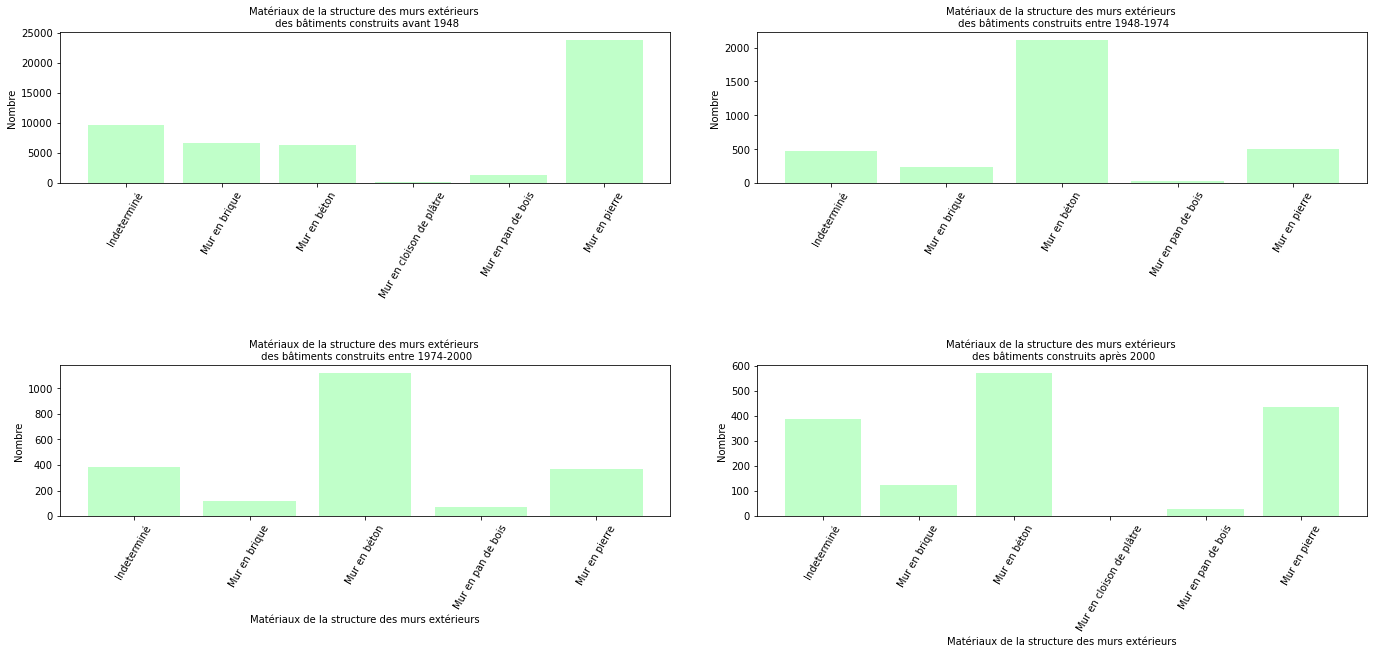

In [336]:
plt.figure(figsize=(20,10))

plt.subplot(221)
list_index_col=j.iloc[10:16,:].index.tolist()
list_index_col=["Indeterminé", "Mur en brique", "Mur en béton", "Mur en cloison de plâtre", "Mur en pan de bois", "Mur en pierre"]
x_ticks=np.arange(len(j.iloc[10:16,:]))
plt.bar(range(len(j.iloc[10:16,:])), j.iloc[10:16,:]["adedpe202006_logtype_mur_mat_ext"], linewidth=5, color="#c0ffc9")
plt.xticks(x_ticks, list_index_col, rotation=60)
plt.ylabel("Nombre")
plt.title("Matériaux de la structure des murs extérieurs \n des bâtiments construits avant 1948", fontsize=10)

plt.subplot(222)
list_index_col=j.iloc[0:5,:].index.tolist()
list_index_col=["Indeterminé", "Mur en brique", "Mur en béton", "Mur en pan de bois", "Mur en pierre"]
x_ticks=np.arange(len(j.iloc[0:5,:]))
plt.bar(range(len(j.iloc[0:5,:])), j.iloc[0:5,:]["adedpe202006_logtype_mur_mat_ext"], linewidth=5, color="#c0ffc9")
plt.xticks(x_ticks, list_index_col, rotation=60)
plt.ylabel("Nombre")
plt.title("Matériaux de la structure des murs extérieurs \n des bâtiments construits entre 1948-1974", fontsize=10)

plt.subplot(223)
list_index_col=j.iloc[5:10,:].index.tolist()
list_index_col=["Indeterminé", "Mur en brique", "Mur en béton", "Mur en pan de bois", "Mur en pierre"]
x_ticks=np.arange(len(j.iloc[5:10,:]))
plt.bar(range(len(j.iloc[5:10,:])), j.iloc[5:10,:]["adedpe202006_logtype_mur_mat_ext"], linewidth=5, color="#c0ffc9")
plt.xticks(x_ticks, list_index_col, rotation=60)
plt.xlabel("Matériaux de la structure des murs extérieurs")
plt.ylabel("Nombre")
plt.title("Matériaux de la structure des murs extérieurs \n des bâtiments construits entre 1974-2000", fontsize=10)

plt.subplot(224)
list_index_col=j.iloc[16:,:].index.tolist()
list_index_col=["Indeterminé", "Mur en brique", "Mur en béton", "Mur en cloison de plâtre", "Mur en pan de bois", "Mur en pierre"]
x_ticks=np.arange(len(j.iloc[16:,:]))
plt.bar(range(len(j.iloc[16:,:])), j.iloc[16:,:]["adedpe202006_logtype_mur_mat_ext"], linewidth=5, color="#c0ffc9")
plt.xticks(x_ticks, list_index_col, rotation=60)
plt.xlabel("Matériaux de la structure des murs extérieurs")
plt.ylabel("Nombre")
plt.title("Matériaux de la structure des murs extérieurs \n des bâtiments construits après 2000", fontsize=10)


plt.tight_layout(4)
plt.show()

In [337]:
# Le code des figures ci-dessus n'est pas très propre. Cherchez mieux

In [338]:
#Analyse de la variable "adedpe202006_logtype_mur_pos_isol_ext" =>(dpe) Type d'isolation des murs
df_selec_2["adedpe202006_logtype_mur_pos_isol_ext"].value_counts()

ITI        41439
Unknown     7032
Autres      6515
ITE          148
ITR           61
Name: adedpe202006_logtype_mur_pos_isol_ext, dtype: int64

In [339]:
df_selec_2["adedpe202006_logtype_mur_pos_isol_ext"].isna().sum()

0

In [340]:
type(df_selec_2["adedpe202006_logtype_mur_pos_isol_ext"].value_counts().index.tolist())

list

In [341]:
df_selec_2["adedpe202006_logtype_mur_pos_isol_ext"]=df_selec_2["adedpe202006_logtype_mur_pos_isol_ext"].fillna("Unknwon")


In [342]:
df_selec_2["adedpe202006_logtype_mur_pos_isol_ext"].index[0]

7819827

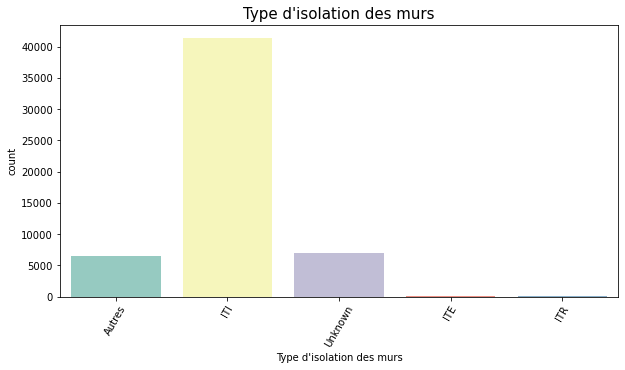

In [343]:
plt.figure(figsize=(10,5))

sns.countplot(x='adedpe202006_logtype_mur_pos_isol_ext', data=df_selec_2, palette="Set3")
plt.title("Type d'isolation des murs", fontsize=15)
plt.xlabel("Type d'isolation des murs")
plt.xticks(rotation=60);

In [344]:
# Suppression de la variable #anarnc202012_nb_log dont on n'a plus besoin et qui sera redondante avec "Taille copro"

df_selec_2=df_selec_2.drop("anarnc202012_nb_log", axis=1)

In [345]:
# La variable "Hauteur de bâtiment n'a plus d'intérêt. Suppression

df_selec_2=df_selec_2.drop("igntop202103_bat_hauteur", axis=1)

In [346]:
# Créer la variable "Durée de détention du bien"

In [347]:
# On commence par isoler les lots qui ont été revendus pendant la période
# On les classe par ordre plus vieux au plus récent
z=df_selec_2[df_selec_2["qty_of_mut"]>0][["etaban_lot","anneemut","valeurfonc"]].sort_values(by=["etaban_lot","anneemut"], ascending=False)

In [348]:
z.head()

,etaban_lot,anneemut,valeurfonc
idmutation,,,
7856361,75118_9854_00023_9,2021,437000.000000
8569316,75118_9854_00023_9,2016,318000.000000
8140774,75118_9854_00021_5,2019,374500.000000
8418100,75118_9854_00021_5,2017,280000.000000
8285726,75118_9854_00014_9,2018,492120.000000


In [349]:
# On créé une colonne qui va nous permettre de distinguer la dernière mutation (last)
# pour calculer la durée de détention à aujourd'hui

etaban_lot=z["etaban_lot"].iloc[0]
z["range_revente_last"]="not last"

for index, value in enumerate(z["etaban_lot"]) :
    if etaban_lot!=value :
        z["range_revente_last"].iloc[index]="last"
    etaban_lot=value
    print(value)

z["range_revente_last"].value_counts()

75118_9854_00023_9
75118_9854_00023_9
75118_9854_00021_5
75118_9854_00021_5
75118_9854_00014_9
75118_9854_00014_9
75118_9854_00005_17
75118_9854_00005_17
75118_9854_00005_17
75118_9854_00001_19
75118_9854_00001_19
75118_9700_00028_24
75118_9700_00028_24
75118_9700_00013_6
75118_9700_00013_6
75118_9700_00013_4
75118_9700_00013_4
75118_9628_00036_16
75118_9628_00036_16
75118_9628_00036_13
75118_9628_00036_13
75118_9628_00035_92
75118_9628_00035_92
75118_9628_00025_322
75118_9628_00025_322
75118_9628_00021_177
75118_9628_00021_177
75118_9628_00021_121
75118_9628_00021_121
75118_9628_00015_109
75118_9628_00015_109
75118_9628_00011_61
75118_9628_00011_61
75118_9628_00010_10
75118_9628_00010_10
75118_9287_00003_11
75118_9287_00003_11
75118_9064_00011_9
75118_9064_00011_9
75118_8981_00011_34
75118_8981_00011_34
75118_8976_00041_8
75118_8976_00041_8
75118_8976_00041_19
75118_8834_00051_19
75118_8834_00051_19
75118_8718_00150_48
75118_8718_00150_48
75118_8718_00090_33
75118_8718_00090_33
75118_

C:\Users\Anne\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


75118_2534_00152_152
75118_2534_00152_152
75118_2534_00142_7
75118_2534_00142_7
75118_2534_00142_12
75118_2534_00142_12
75118_2534_00142_10
75118_2534_00142_10
75118_2534_00124_7
75118_2534_00124_7
75118_2534_00124_11
75118_2534_00124_11
75118_2534_00116_36
75118_2534_00116_36
75118_2534_00113_5
75118_2534_00113_5
75118_2534_00109_17
75118_2534_00109_17
75118_2534_00109_16
75118_2534_00109_16
75118_2534_00109_16
75118_2534_00105_12
75118_2534_00105_12
75118_2534_00103_10
75118_2534_00103_10
75118_2534_00096_25
75118_2534_00096_25
75118_2534_00096_133
75118_2534_00096_133
75118_2534_00076_5
75118_2534_00076_5
75118_2534_00057_11
75118_2534_00057_11
75118_2534_00054_22
75118_2534_00054_22
75118_2534_00054_11
75118_2534_00054_11
75118_2534_00048_39
75118_2534_00048_39
75118_2534_00046_50
75118_2534_00046_50
75118_2534_00044_76
75118_2534_00044_76
75118_2534_00044_26
75118_2534_00044_26
75118_2534_00042_11
75118_2534_00042_11
75118_2534_00040_111
75118_2534_00040_111
75118_2534_00037_24
75

75117_5503_00027_103
75117_5503_00027_103
75117_5503_00023_103
75117_5503_00023_103
75117_5473_00164_9
75117_5473_00164_9
75117_5473_00164_9
75117_5473_00161_44
75117_5473_00161_44
75117_5473_00158_51
75117_5473_00140_41
75117_5473_00140_41
75117_5473_00138_4
75117_5473_00138_4
75117_5473_00138_11
75117_5473_00138_11
75117_5473_00137_5
75117_5473_00137_5
75117_5473_00116_197
75117_5473_00116_197
75117_5473_00106_14
75117_5473_00106_14
75117_5473_00094_130
75117_5473_00094_130
75117_5473_00094_126
75117_5473_00094_126
75117_5473_00092_22
75117_5473_00092_22
75117_5473_00090_21
75117_5473_00090_21
75117_5473_00087_31
75117_5473_00087_31
75117_5473_00054_17
75117_5473_00054_17
75117_5473_00054_12
75117_5473_00054_12
75117_5473_00054_12
75117_5473_00045_7
75117_5473_00045_7
75117_5473_00045_10
75117_5473_00045_10
75117_5473_00044_26
75117_5473_00044_26
75117_5473_00044_20
75117_5473_00044_20
75117_5473_00038_33
75117_5473_00038_33
75117_5447_00026_13
75117_5447_00026_13
75117_5447_00015_7


75116_9706_00178_42
75116_9706_00178_42
75116_9706_00173_7
75116_9706_00173_7
75116_9706_00173_4
75116_9706_00173_4
75116_9706_00166_208
75116_9706_00166_208
75116_9706_00164_22
75116_9706_00164_22
75116_9706_00164_21
75116_9706_00164_21
75116_9706_00158_218
75116_9706_00158_218
75116_9706_00142_16
75116_9706_00142_16
75116_9706_00139_9
75116_9706_00139_9
75116_9706_00139_10
75116_9706_00139_10
75116_9706_00135_141
75116_9706_00135_141
75116_9706_00126_20
75116_9706_00126_20
75116_9706_00104_16
75116_9706_00104_16
75116_9706_00096_17
75116_9706_00096_17
75116_9706_00095_4
75116_9706_00095_4
75116_9706_00094_29
75116_9706_00094_29
75116_9706_00084_19
75116_9706_00084_19
75116_9706_00073_39
75116_9706_00073_39
75116_9706_00058_412
75116_9706_00058_412
75116_9706_00033_33
75116_9706_00033_33
75116_9706_00025_13
75116_9706_00025_13
75116_9706_00018_22
75116_9706_00018_22
75116_9706_00013_1
75116_9706_00013_1
75116_9706_00012_49
75116_9706_00012_49
75116_9603_00020_91
75116_9603_00020_91
75

75116_1690_00009_28
75116_1690_00009_28
75116_1690_00009_27
75116_1690_00009_27
75116_1690_00005_27
75116_1690_00005_27
75116_1690_00005_18
75116_1690_00005_18
75116_1690_00005_17
75116_1690_00005_17
75116_1680_00037_55
75116_1680_00037_55
75116_1373_00038_318
75116_1373_00038_318
75116_1180_00019_15
75116_1180_00019_15
75116_1180_00011_27
75116_1180_00011_27
75116_1154_00047_5
75116_1154_00047_5
75116_1154_00020_18
75116_1154_00020_18
75116_1154_00011_86
75116_1154_00011_86
75116_1154_00011_35
75116_1154_00011_35
75116_1075_00008_2
75116_1075_00008_2
75116_1074_00072_12
75116_1074_00072_12
75116_1074_00062_19
75116_1074_00062_19
75116_1074_00062_10
75116_1074_00062_10
75116_1074_00048_10
75116_1074_00048_10
75116_1072_00022_4
75116_1072_00022_4
75116_1072_00022_14
75116_1072_00022_14
75116_1072_00012_2
75116_1072_00012_2
75116_1058_00104_48
75116_1058_00104_48
75116_1058_00102_14
75116_1058_00102_14
75116_1058_00095_23
75116_1058_00095_23
75116_1058_00095_22
75116_1058_00095_22
75116_

75115_3957_00023_23
75115_3957_00023_23
75115_3957_00017_17
75115_3957_00017_17
75115_3911_00009_2
75115_3911_00009_2
75115_3911_00007_3
75115_3911_00007_3
75115_3859_00013_224
75115_3859_00013_224
75115_3852_00004_9
75115_3852_00004_9
75115_3845_00003_12
75115_3845_00003_12
75115_3842_00008_69
75115_3842_00008_69
75115_3842_00004_23
75115_3842_00004_23
75115_3807_00007_8
75115_3807_00007_8
75115_3807_00003_18
75115_3807_00003_18
75115_3807_00001_103
75115_3807_00001_103
75115_3795_00001_14
75115_3795_00001_14
75115_3765_00007_26
75115_3765_00007_26
75115_3765_00006_17
75115_3765_00006_17
75115_3765_00006_16
75115_3765_00006_16
75115_3705_00077_145
75115_3705_00077_145
75115_3705_00047_28
75115_3705_00047_28
75115_3705_00047_160
75115_3705_00047_160
75115_3705_00028_4
75115_3705_00028_4
75115_3656_00006_147
75115_3656_00006_147
75115_3656_00004_26
75115_3656_00004_26
75115_3654_00016_21
75115_3654_00016_21
75115_3654_00014_1
75115_3654_00014_1
75115_3654_00002_5
75115_3654_00002_5
7511

75114_6776_00001_11
75114_6776_00001_11
75114_6669_00018_427
75114_6669_00018_427
75114_6669_00016_32
75114_6669_00016_32
75114_6620_00021_42
75114_6620_00021_42
75114_6620_00006_6
75114_6620_00006_6
75114_6620_00006_6
75114_6620_00006_24
75114_6620_00006_24
75114_6620_00002_29
75114_6620_00002_29
75114_6606_00068_14
75114_6606_00068_14
75114_6606_00041_6
75114_6606_00041_6
75114_6606_00023_16
75114_6606_00023_16
75114_6606_00018_24
75114_6606_00018_24
75114_6606_00006_5
75114_6606_00006_5
75114_6551_00012_11
75114_6551_00012_11
75114_6551_00004_7
75114_6551_00004_7
75114_6551_00004_2
75114_6551_00004_2
75114_6522_00168_15
75114_6522_00168_15
75114_6522_00146_48
75114_6522_00146_48
75114_6522_00144_30
75114_6522_00144_30
75114_6461_00002_7
75114_6461_00002_7
75114_6460_00008_2
75114_6460_00008_2
75114_6238_00007_29
75114_6238_00007_29
75114_6213_00005_3
75114_6213_00005_3
75114_6213_00005_10
75114_6213_00005_10
75114_6209_00068_11
75114_6209_00068_11
75114_6090_00008_76
75114_6090_0000

75113_2328_00024_54
75113_2328_00024_54
75113_2328_00019_1168
75113_2328_00019_1168
75113_2217_00079_13
75113_2217_00079_13
75113_2217_00067_264
75113_2217_00067_264
75113_2217_00053_163
75113_2217_00053_163
75113_2047_00041_11
75113_2047_00041_11
75113_2047_00015_9
75113_2047_00015_9
75113_2047_00006_55
75113_2047_00006_55
75113_2015_00169_111
75113_2015_00169_111
75113_2015_00165_12
75113_2015_00165_12
75113_2015_00145_21
75113_2015_00145_21
75113_2015_00086_16
75113_2015_00086_16
75113_2015_00071_20
75113_2015_00071_20
75113_2015_00022_114
75113_2015_00022_114
75113_1990_00153_32
75113_1990_00153_32
75113_1990_00113_130
75113_1990_00113_130
75113_1990_00113_125
75113_1990_00113_125
75113_1990_00101_39
75113_1990_00101_39
75113_1990_00093_126
75113_1990_00093_126
75113_1990_00073_31
75113_1990_00073_31
75113_1990_00010_23
75113_1990_00010_23
75113_1918_00066_22
75113_1918_00066_22
75113_1864_00004_12
75113_1864_00004_12
75113_1834_00027_16
75113_1834_00027_16
75113_1496_00064_15
7511

75111_8901_00011_11
75111_8901_00011_11
75111_8901_00006_44
75111_8901_00006_44
75111_8756_00050_28
75111_8756_00050_28
75111_8756_00037_27
75111_8756_00037_27
75111_8756_00034_24
75111_8756_00034_24
75111_8756_00015_21
75111_8756_00015_21
75111_8756_00015_21
75111_8748_00044_34
75111_8748_00044_34
75111_8748_00016_47
75111_8748_00016_47
75111_8699_00166_4
75111_8699_00166_4
75111_8699_00160_42
75111_8699_00160_42
75111_8699_00159_43
75111_8699_00159_43
75111_8699_00151_9
75111_8699_00151_9
75111_8699_00151_6
75111_8699_00151_6
75111_8699_00151_29
75111_8699_00151_29
75111_8699_00148_1214
75111_8699_00148_1214
75111_8699_00148_1136
75111_8699_00148_1136
75111_8699_00148_1136
75111_8699_00134_64
75111_8699_00134_64
75111_8699_00134_17
75111_8699_00134_17
75111_8699_00133_8
75111_8699_00133_8
75111_8699_00133_5
75111_8699_00133_5
75111_8699_00132_54
75111_8699_00132_54
75111_8699_00117_5
75111_8699_00117_5
75111_8699_00117_21
75111_8699_00117_21
75111_8699_00112_28
75111_8699_00112_28
75

75111_3008_00013_6
75111_3008_00013_58
75111_3008_00013_58
75111_3008_00013_58
75111_3008_00013_4
75111_3008_00013_4
75111_3008_00013_4
75111_3008_00012_2
75111_3008_00012_2
75111_3008_00008_51
75111_3008_00008_51
75111_3008_00008_28
75111_3008_00008_28
75111_3008_00006_13
75111_3008_00006_13
75111_2716_00008_39
75111_2716_00008_39
75111_2588_00002_6
75111_2588_00002_6
75111_2515_00016_30
75111_2515_00016_30
75111_2475_00014_26
75111_2475_00014_26
75111_2475_00011_20
75111_2475_00011_20
75111_2455_00011_36
75111_2455_00011_36
75111_2455_00011_25
75111_2455_00011_25
75111_2455_00011_25
75111_2455_00003_2
75111_2455_00003_2
75111_2434_00012_150
75111_2434_00012_150
75111_2434_00012_150
75111_2434_00009_83
75111_2434_00009_83
75111_2002_00013_10
75111_2002_00013_10
75111_1966_00154_41
75111_1966_00154_41
75111_1966_00150_15
75111_1966_00150_15
75111_1966_00135_106
75111_1966_00135_106
75111_1966_00119_7
75111_1966_00119_7
75111_1966_00119_139
75111_1966_00119_139
75111_1966_00119_137
7511

75110_3508_00107_3
75110_3508_00107_3
75110_3508_00083_101
75110_3508_00083_101
75110_3508_00059_714
75110_3508_00059_714
75110_3508_00057_20
75110_3508_00057_20
75110_3508_00053_4
75110_3508_00053_4
75110_3508_00053_18
75110_3508_00053_18
75110_3508_00033_60
75110_3508_00033_60
75110_3508_00031_7
75110_3508_00031_7
75110_3442_00020_48
75110_3442_00020_48
75110_3284_00040_85
75110_3284_00040_85
75110_3284_00040_74
75110_3284_00040_74
75110_3284_00031_30
75110_3284_00031_30
75110_3284_00027_8
75110_3284_00027_8
75110_3084_00041_75
75110_3084_00041_75
75110_3084_00028_26
75110_3084_00028_26
75110_3084_00022_123
75110_3084_00022_123
75110_3084_00016_19
75110_3084_00016_19
75110_3084_00014_45
75110_3084_00014_45
75110_3084_00012_20
75110_3084_00012_20
75110_2990_00034_9
75110_2990_00034_9
75110_2990_00001_15
75110_2990_00001_15
75110_2799_00006_16
75110_2799_00006_16
75110_2768_00009_26
75110_2768_00009_26
75110_2768_00008_3
75110_2768_00008_3
75110_2738_00036_202
75110_2738_00036_202
7511

75108_0900_00006_15
75108_0900_00006_15
75108_0779_00040_29
75108_0779_00040_29
75108_0779_00012_51
75108_0779_00012_51
75108_0719_00029_26
75108_0719_00029_26
75108_0652_00008_34
75108_0652_00008_34
75108_0487_00008_22
75108_0487_00008_22
75108_0487_00008_20
75108_0487_00008_20
75107_9911_00017_16
75107_9911_00017_16
75107_9691_00056_60
75107_9691_00056_60
75107_9691_00054_126
75107_9691_00054_126
75107_9691_00035_23
75107_9691_00035_23
75107_9691_00035_23
75107_9691_00029_8
75107_9691_00029_8
75107_9691_00020_79
75107_9691_00020_79
75107_9691_00020_22
75107_9691_00020_22
75107_9691_00018_11
75107_9691_00018_11
75107_9691_00011_31
75107_9691_00011_31
75107_9691_00011_26
75107_9691_00011_26
75107_9597_00048_17
75107_9597_00048_17
75107_9588_00041_20
75107_9588_00041_20
75107_9542_00005_8
75107_9542_00005_8
75107_9527_00193_176
75107_9527_00193_176
75107_9527_00164_10
75107_9527_00164_10
75107_9527_00086_91
75107_9527_00086_91
75107_9527_00050_5
75107_9527_00050_5
75107_9527_00036_31
75

75104_7213_00011_11
75104_7213_00011_11
75104_7213_00007_27
75104_7213_00007_27
75104_7213_00001_1
75104_7213_00001_1
75104_7195_00006_7
75104_7195_00006_7
75104_7195_00006_7
75104_6944_00011_5
75104_6944_00011_5
75104_5958_00020_105
75104_5958_00020_105
75104_5958_00004_10
75104_5958_00004_10
75104_5738_00012_17
75104_5738_00012_17
75104_5738_00006_18
75104_5738_00006_18
75104_5738_00006_12
75104_5738_00006_12
75104_5702_00015_120
75104_5702_00015_120
75104_5702_00014_145
75104_5702_00014_145
75104_5616_00010_15
75104_5616_00010_15
75104_5599_00011_6
75104_5599_00011_6
75104_4583_00027_210
75104_4583_00027_210
75104_4365_00010_8
75104_4365_00010_8
75104_4365_00008_24
75104_4365_00008_24
75104_4365_00004_10
75104_4365_00004_10
75104_4365_00002_6
75104_4365_00002_6
75104_4102_00007_125
75104_4102_00007_125
75104_3805_00019_17
75104_3805_00019_17
75104_3583_00002_7
75104_3583_00002_7
75104_3106_00025_34
75104_3106_00025_34
75104_2774_00035_41
75104_2774_00035_41
75104_2774_00019_36
75104

not last    5040
last        4871
Name: range_revente_last, dtype: int64

In [350]:
z.head()

,etaban_lot,anneemut,valeurfonc,range_revente_last
idmutation,,,,
7856361,75118_9854_00023_9,2021,437000.000000,not last
8569316,75118_9854_00023_9,2016,318000.000000,not last
8140774,75118_9854_00021_5,2019,374500.000000,last
8418100,75118_9854_00021_5,2017,280000.000000,not last
8285726,75118_9854_00014_9,2018,492120.000000,last


In [351]:
# Renommer la valeur de "range_revente_last" en 1ère ligne du df pq elle a servi à la mise en place du compteur
# Elle était donc restée en "not last"

In [352]:
z["range_revente_last"].iloc[0]="last"

C:\Users\Anne\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [353]:
z["duree_detention"]=z["anneemut"].diff()

In [354]:
z.head()

,etaban_lot,anneemut,valeurfonc,range_revente_last,duree_detention
idmutation,,,,,
7856361,75118_9854_00023_9,2021,437000.000000,last,NaN
8569316,75118_9854_00023_9,2016,318000.000000,not last,-5.000000
8140774,75118_9854_00021_5,2019,374500.000000,last,3.000000
8418100,75118_9854_00021_5,2017,280000.000000,not last,-2.000000
8285726,75118_9854_00014_9,2018,492120.000000,last,1.000000


In [355]:
# pour les not last => passer en positif

In [356]:
z["duree_detention"][z["range_revente_last"]=="not last"]=-z["duree_detention"][z["range_revente_last"]=="not last"]

C:\Users\Anne\AppData\Local\Temp/ipykernel_4312/1681290974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z["duree_detention"][z["range_revente_last"]=="not last"]=-z["duree_detention"][z["range_revente_last"]=="not last"]


In [357]:
z.head()

,etaban_lot,anneemut,valeurfonc,range_revente_last,duree_detention
idmutation,,,,,
7856361,75118_9854_00023_9,2021,437000.000000,last,NaN
8569316,75118_9854_00023_9,2016,318000.000000,not last,5.000000
8140774,75118_9854_00021_5,2019,374500.000000,last,3.000000
8418100,75118_9854_00021_5,2017,280000.000000,not last,2.000000
8285726,75118_9854_00014_9,2018,492120.000000,last,1.000000


In [358]:
# On merge z avec df_selec_2
z=z[["range_revente_last", "duree_detention"]]


In [359]:
df_selec_2=df_selec_2.merge(right=z, on="idmutation", how="left")

In [360]:
df_selec_2[["etaban_lot","qty_of_mut", "anneemut", "range_revente_last","duree_detention"]].sort_values(by=["etaban_lot", "anneemut"], ascending=False)

,etaban_lot,qty_of_mut,anneemut,range_revente_last,duree_detention
idmutation,,,,,
7856361,75118_9854_00023_9,1,2021,last,NaN
8569316,75118_9854_00023_9,1,2016,not last,5.000000
8578190,75118_9854_00023_2,0,2016,NaN,NaN
8818796,75118_9854_00023_15,0,2014,NaN,NaN
8584854,75118_9854_00021_7,0,2016,NaN,NaN
...,...,...,...,...,...
8712568,75101_0407_00048_29,0,2015,NaN,NaN
8559654,75101_0407_00048_28,0,2016,NaN,NaN
8707053,75101_0407_00048_15,0,2015,NaN,NaN


In [361]:
df_selec_2["range_revente_last"]=df_selec_2["range_revente_last"].fillna("last")

In [362]:
# pour les last => on remplace durée de détention par = date aujourd'hui - annee mutation

In [363]:
from datetime import date, time, datetime
df_selec_2["annee_en_cours"]=date.today().year

In [364]:
df_selec_2["duree_detention"][df_selec_2["range_revente_last"]=="last"]=df_selec_2["annee_en_cours"]-df_selec_2["anneemut"]

C:\Users\Anne\AppData\Local\Temp/ipykernel_4312/1924191288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selec_2["duree_detention"][df_selec_2["range_revente_last"]=="last"]=df_selec_2["annee_en_cours"]-df_selec_2["anneemut"]


In [365]:
# vérif générale
df_selec_2[["etaban_lot","qty_of_mut", "anneemut", "range_revente_last","duree_detention"]].sort_values(by=["etaban_lot", "anneemut"], ascending=False)

,etaban_lot,qty_of_mut,anneemut,range_revente_last,duree_detention
idmutation,,,,,
7856361,75118_9854_00023_9,1,2021,last,1.000000
8569316,75118_9854_00023_9,1,2016,not last,5.000000
8578190,75118_9854_00023_2,0,2016,last,6.000000
8818796,75118_9854_00023_15,0,2014,last,8.000000
8584854,75118_9854_00021_7,0,2016,last,6.000000
...,...,...,...,...,...
8712568,75101_0407_00048_29,0,2015,last,7.000000
8559654,75101_0407_00048_28,0,2016,last,6.000000
8707053,75101_0407_00048_15,0,2015,last,7.000000


In [366]:
# Vérif sur les qty_of_mut=0
df_selec_2[df_selec_2["qty_of_mut"]==0][["etaban_lot","qty_of_mut", "anneemut", "range_revente_last","duree_detention"]].sort_values(by=["etaban_lot", "anneemut"], ascending=False)

,etaban_lot,qty_of_mut,anneemut,range_revente_last,duree_detention
idmutation,,,,,
8578190,75118_9854_00023_2,0,2016,last,6.000000
8818796,75118_9854_00023_15,0,2014,last,8.000000
8584854,75118_9854_00021_7,0,2016,last,6.000000
8299814,75118_9854_00021_24,0,2018,last,4.000000
8450438,75118_9854_00021_16,0,2017,last,5.000000
...,...,...,...,...,...
8712568,75101_0407_00048_29,0,2015,last,7.000000
8559654,75101_0407_00048_28,0,2016,last,6.000000
8707053,75101_0407_00048_15,0,2015,last,7.000000


In [367]:
# Vérif sur les qty_of_mut=1
df_selec_2[df_selec_2["qty_of_mut"]==1][["etaban_lot","qty_of_mut", "anneemut", "range_revente_last","duree_detention"]].sort_values(by=["etaban_lot", "anneemut"], ascending=False)

,etaban_lot,qty_of_mut,anneemut,range_revente_last,duree_detention
idmutation,,,,,
7856361,75118_9854_00023_9,1,2021,last,1.000000
8569316,75118_9854_00023_9,1,2016,not last,5.000000
8140774,75118_9854_00021_5,1,2019,last,3.000000
8418100,75118_9854_00021_5,1,2017,not last,2.000000
8285726,75118_9854_00014_9,1,2018,last,4.000000
...,...,...,...,...,...
8712767,75101_0407_00056_21,1,2015,not last,3.000000
8119208,75101_0407_00049_5,1,2019,last,3.000000
8439768,75101_0407_00049_5,1,2017,not last,2.000000


In [368]:
# Vérif sur les qty_of_mut=2
df_selec_2[df_selec_2["qty_of_mut"]==2][["etaban_lot","qty_of_mut", "anneemut", "range_revente_last","duree_detention"]].sort_values(by=["etaban_lot", "anneemut"], ascending=False)

,etaban_lot,qty_of_mut,anneemut,range_revente_last,duree_detention
idmutation,,,,,
7968551,75118_9854_00005_17,2,2020,last,2.000000
8418316,75118_9854_00005_17,2,2017,not last,3.000000
8827570,75118_9854_00005_17,2,2014,not last,3.000000
7830955,75118_7986_00015_20,2,2021,last,1.000000
8292654,75118_7986_00015_20,2,2018,not last,3.000000
...,...,...,...,...,...
8586111,75102_7738_00010_13,2,2016,not last,2.000000
8697260,75102_7738_00010_13,2,2015,not last,1.000000
8107294,75102_2110_00006_16,2,2019,last,3.000000


In [369]:
# Vérif sur les qty_of_mut=3
df_selec_2[df_selec_2["qty_of_mut"]==3][["etaban_lot","qty_of_mut", "anneemut", "range_revente_last","duree_detention"]].sort_values(by=["etaban_lot", "anneemut"], ascending=False)

,etaban_lot,qty_of_mut,anneemut,range_revente_last,duree_detention
idmutation,,,,,
7830682,75118_2974_00023_4,3,2021,last,1.000000
8555709,75118_2974_00023_4,3,2016,not last,5.000000
8582225,75118_2974_00023_4,3,2016,not last,-0.000000
8700271,75118_2974_00023_4,3,2015,not last,1.000000
8106960,75117_9209_00008_42,3,2019,last,3.000000
8421202,75117_9209_00008_42,3,2017,not last,2.000000
8453658,75117_9209_00008_42,3,2017,not last,-0.000000
8830421,75117_9209_00008_42,3,2014,not last,3.000000
7831807,75114_5465_00022_19,3,2021,last,1.000000


In [370]:
# Bizarre ces mutations qui ont été revendus 2 fois la même année => doublons ?

In [371]:
w=df_selec_2.groupby("l_codinsee").agg({"duree_detention":"mean"})

Attention : Dans cette variable 'Durée de détention', on a à la fois 
 des durées passées et des durées en cours à aujourd'hui


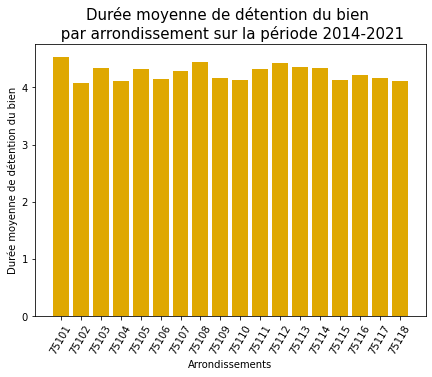

In [372]:
list_arrond=w.index.tolist()
x_ticks=np.arange(len(w))

plt.figure(figsize=(7,5))
plt.bar(range(len(w)), w["duree_detention"], linewidth=5, color="#dfa801")
plt.xticks(x_ticks, list_arrond, rotation=60)
plt.xlabel("Arrondissements")
plt.ylabel("Durée moyenne de détention du bien")
plt.title("Durée moyenne de détention du bien \n par arrondissement sur la période 2014-2021", fontsize=15);
print('\033[1m' +"Attention : Dans cette variable 'Durée de détention', on a à la fois \n des durées passées et des durées en cours à aujourd'hui")


In [373]:
z=df_selec_2.groupby("Type appart").agg({"duree_detention":"mean"})

Attention : Dans cette variable 'Durée de détention', on a à la fois 
 des durées passées et des durées en cours à aujourd'hui


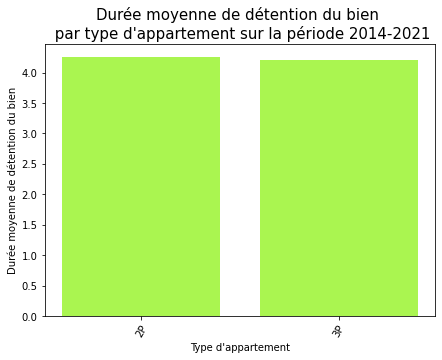

In [374]:
list_z=z.index.tolist()
x_ticks=np.arange(len(z))

plt.figure(figsize=(7,5))
plt.bar(range(len(z)), z["duree_detention"], linewidth=5, color="#aaf550")
plt.xticks(x_ticks, list_z, rotation=60)
plt.xlabel("Type d'appartement")
plt.ylabel("Durée moyenne de détention du bien")
plt.title("Durée moyenne de détention du bien \n par type d'appartement sur la période 2014-2021", fontsize=15);

print('\033[1m' +"Attention : Dans cette variable 'Durée de détention', on a à la fois \n des durées passées et des durées en cours à aujourd'hui")


In [375]:
z=df_selec_2.groupby("cerffo2020_annee_construction").agg({"duree_detention":"mean"})

Attention : Dans cette variable 'Durée de détention', on a à la fois 
 des durées passées et des durées en cours à aujourd'hui


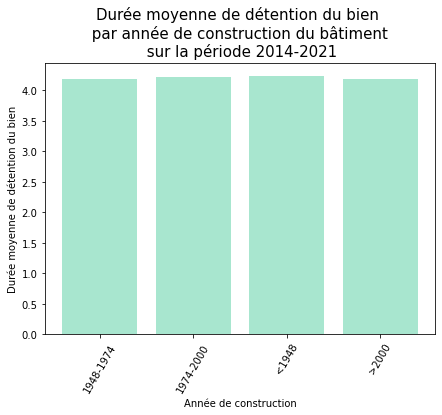

In [376]:
list_z=z.index.tolist()
x_ticks=np.arange(len(z))

plt.figure(figsize=(7,5))
plt.bar(range(len(z)), z["duree_detention"], linewidth=5, color="#a8e6cf")
plt.xticks(x_ticks, list_z, rotation=60)
plt.xlabel("Année de construction")
plt.ylabel("Durée moyenne de détention du bien")
plt.title("Durée moyenne de détention du bien \n par année de construction du bâtiment \n sur la période 2014-2021", fontsize=15);
print('\033[1m' +"Attention : Dans cette variable 'Durée de détention', on a à la fois \n des durées passées et des durées en cours à aujourd'hui")


In [377]:
z=df_selec_2.groupby("adedpe202006_mean_class_conso_ener").agg({"duree_detention":"mean"})

Attention : Dans cette variable 'Durée de détention', on a à la fois 
 des durées passées et des durées en cours à aujourd'hui


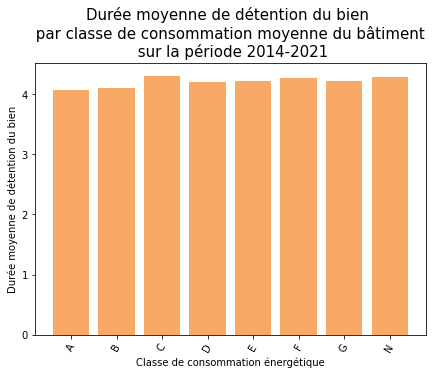

In [378]:
list_z=z.index.tolist()
x_ticks=np.arange(len(z))

plt.figure(figsize=(7,5))
plt.bar(range(len(z)), z["duree_detention"], linewidth=5, color="#f8a966")
plt.xticks(x_ticks, list_z, rotation=60)
plt.xlabel("Classe de consommation énergétique")
plt.ylabel("Durée moyenne de détention du bien")
plt.title("Durée moyenne de détention du bien \n par classe de consommation moyenne du bâtiment \n sur la période 2014-2021", fontsize=15);
print('\033[1m' +"Attention : Dans cette variable 'Durée de détention', on a à la fois \n des durées passées et des durées en cours à aujourd'hui")


In [379]:
z=df_selec_2.groupby("insbpe2019_l_type_equipement_bruyant").agg({"duree_detention":"mean"})

Attention : Dans cette variable 'Durée de détention', on a à la fois 
 des durées passées et des durées en cours à aujourd'hui


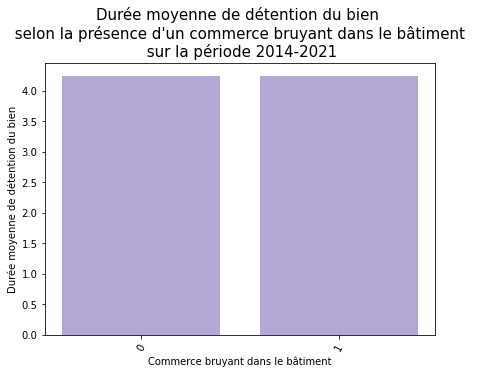

In [380]:
list_z=z.index.tolist()
x_ticks=np.arange(len(z))

plt.figure(figsize=(7,5))
plt.bar(range(len(z)), z["duree_detention"], linewidth=5, color="#b4a7d6")
plt.xticks(x_ticks, list_z, rotation=60)
plt.xlabel("Commerce bruyant dans le bâtiment")
plt.ylabel("Durée moyenne de détention du bien")
plt.title("Durée moyenne de détention du bien \n selon la présence d'un commerce bruyant dans le bâtiment \n sur la période 2014-2021", fontsize=15);
print('\033[1m' +"Attention : Dans cette variable 'Durée de détention', on a à la fois \n des durées passées et des durées en cours à aujourd'hui")


In [381]:
df_selec_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55195 entries, 7819827 to 8843163
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   qty_of_mut                                55195 non-null  int64   
 1   Revente                                   55195 non-null  int64   
 2   datemut                                   55195 non-null  object  
 3   anneemut                                  55195 non-null  int64   
 4   moismut                                   55195 non-null  int64   
 5   Immeuble_neuf                             55195 non-null  int64   
 6   valeurfonc                                55195 non-null  float64 
 7   nblot                                     55195 non-null  object  
 8   l_codinsee                                55195 non-null  int64   
 9   nblocdep                                  55195 non-null  object  
 10  Type appart   

In [382]:
#suppression des variables qui vont gêner la modélisation ou pas utiles :

df_selec_2=df_selec_2.drop(["valeurfonc", 
               "cerffo2020_nb_log", 
               "insbpe2019_l_type_equipement_supermarché", 
               "insbpe2019_l_type_equipement_restaurant", 
              "insbpe2019_l_type_equipement_boulangerie",
              "insbpe2019_l_type_equipement_aucun",
              "insbpe2019_l_type_equipement_autre",
              "qty_of_mut",
              "datemut",
              "moismut",
              "anneemut",
              "etaban_lot",
              "cat_valeur",
              "range_revente_first",
              "range_revente_last",
              "cat_scarrez",
               "annee_en_cours"], axis=1)

In [383]:
df_selec_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55195 entries, 7819827 to 8843163
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Revente                                55195 non-null  int64  
 1   Immeuble_neuf                          55195 non-null  int64  
 2   nblot                                  55195 non-null  object 
 3   l_codinsee                             55195 non-null  int64  
 4   nblocdep                               55195 non-null  object 
 5   Type appart                            55195 non-null  object 
 6   scarrez                                55195 non-null  float64
 7   anarnc202012_nb_lot_tot                55195 non-null  float64
 8   adedpe202006_mean_class_conso_ener     55195 non-null  object 
 9   adedpe202006_mean_class_estim_ges      55195 non-null  object 
 10  adedpe202006_logtype_traversant        55195 non-null  object 

In [384]:
df2=df_selec_2

In [385]:
df2.to_csv(r"C:\Users\Anne\Projet Bâtiment\210622\df2.csv", index=False)

##### df.to_csv(r"C:\Users\Anne\Projet Bâtiment\210622\df.csv", index=False)